# 0.&nbsp;Connect to G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
default_dir = "/content/drive/MyDrive/Data DS Bootcamp/House Price/"
os.chdir(default_dir)

In [ ]:
!ls

'Copy of data_descriptions.docx'   test.csv   train.csv


## 0.1. Import Libraries

In [ ]:
# Data Exploration, Analysis & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import norm, chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import sklearn

import pprint

# Configure Environment
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

## 0.2. Load Dataset

In [ ]:
# Load Train set
df_train = pd.read_csv("train.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Load Test set
df_test = pd.read_csv("test.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(1460, 81)

Test set shape:
(1459, 80)


# 1.&nbsp;Exploratory Data Analysis

In [ ]:
# Info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*Beberapa data ada yg memiliki null values*

In [ ]:
# Checking if column headings are the same in both datasets
# Use sets for efficient comparison -> unique
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

# Find columns present in train but not in test
dif_1 = list(train_cols - test_cols)
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

# Find columns present in test but not in train
dif_2 = list(test_cols - train_cols)
print(f"Columns present in df_test and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test and absent in df_train: []


In [ ]:
# Store the Id columns before dropping them
Id_train = df_train['Id']
Id_test = df_test['Id']

# Drop 'Id' columns
df_train = df_train.drop(columns='Id')
df_test = df_test.drop(columns='Id')

## 1.1. Numerical Features

### 1.1.1 Explore and Clean Numerical Features

In [ ]:
# Let's select the columns of the train set with numerical data
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60        65.00     8450            7            5       2003   
1          20        80.00     9600            6            8       1976   
2          60        68.00    11250            7            5       2001   
3          70        60.00     9550            7            5       1915   
4          60        84.00    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003      196.00         706           0  ...           0   
1          1976        0.00         978           0  ...         298   
2          2002      162.00         486           0  ...           0   
3          1970        0.00         216           0  ...           0   
4          2000      350.00         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [ ]:
# constant features dihilangkan karena variansi yang rendah dalam satu feature
# Define a threshold for quasi-constant features (e.g., 95% similar values)
quasi_constant_threshold = 0.05

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(
    threshold=quasi_constant_threshold
)

# Fit the selector to the numerical features (excluding the target variable 'SalePrice')
selector.fit(df_train_num.iloc[:, :-1])

# Get the indices of features that are not quasi-constant
# These are the features we want to keep.
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features:
selected_feature_names = (
    df_train_num
    .columns[selected_feature_indices]
    .tolist()
)

print(f"Selected features:")
pprint.pprint(selected_feature_names)

Selected features:
['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']


In [ ]:
# Get the number of features that are not constant
print(f"Number of retained features:")
print(len(selected_feature_indices))
print("/n")
print(f"Number of quasi_constant features:")
print(len(df_train_num.iloc[:, :-1].columns) - len(selected_feature_indices))

Number of retained features:
35
/n
Number of quasi_constant features:
1


In [ ]:
quasi_constant_features = list(
    (set(df_train_num.iloc[:, :-1].columns) - set(selected_feature_names))
)

print(f"Unselected (quasi-constant) features to be dropped:")
pprint.pprint(quasi_constant_features)

Unselected (quasi-constant) features to be dropped:
['KitchenAbvGr']


In [ ]:
df_train_num['KitchenAbvGr'].value_counts(normalize=1)

KitchenAbvGr
1   0.95
2   0.04
3   0.00
0   0.00
Name: proportion, dtype: float64

In [ ]:
# Let's drop these columns from df_train_num
# Quiz: Why drop quasi, not select the non quasi? (SalePrice)
df_train_num.drop(
    columns=quasi_constant_features,
    inplace=True
)

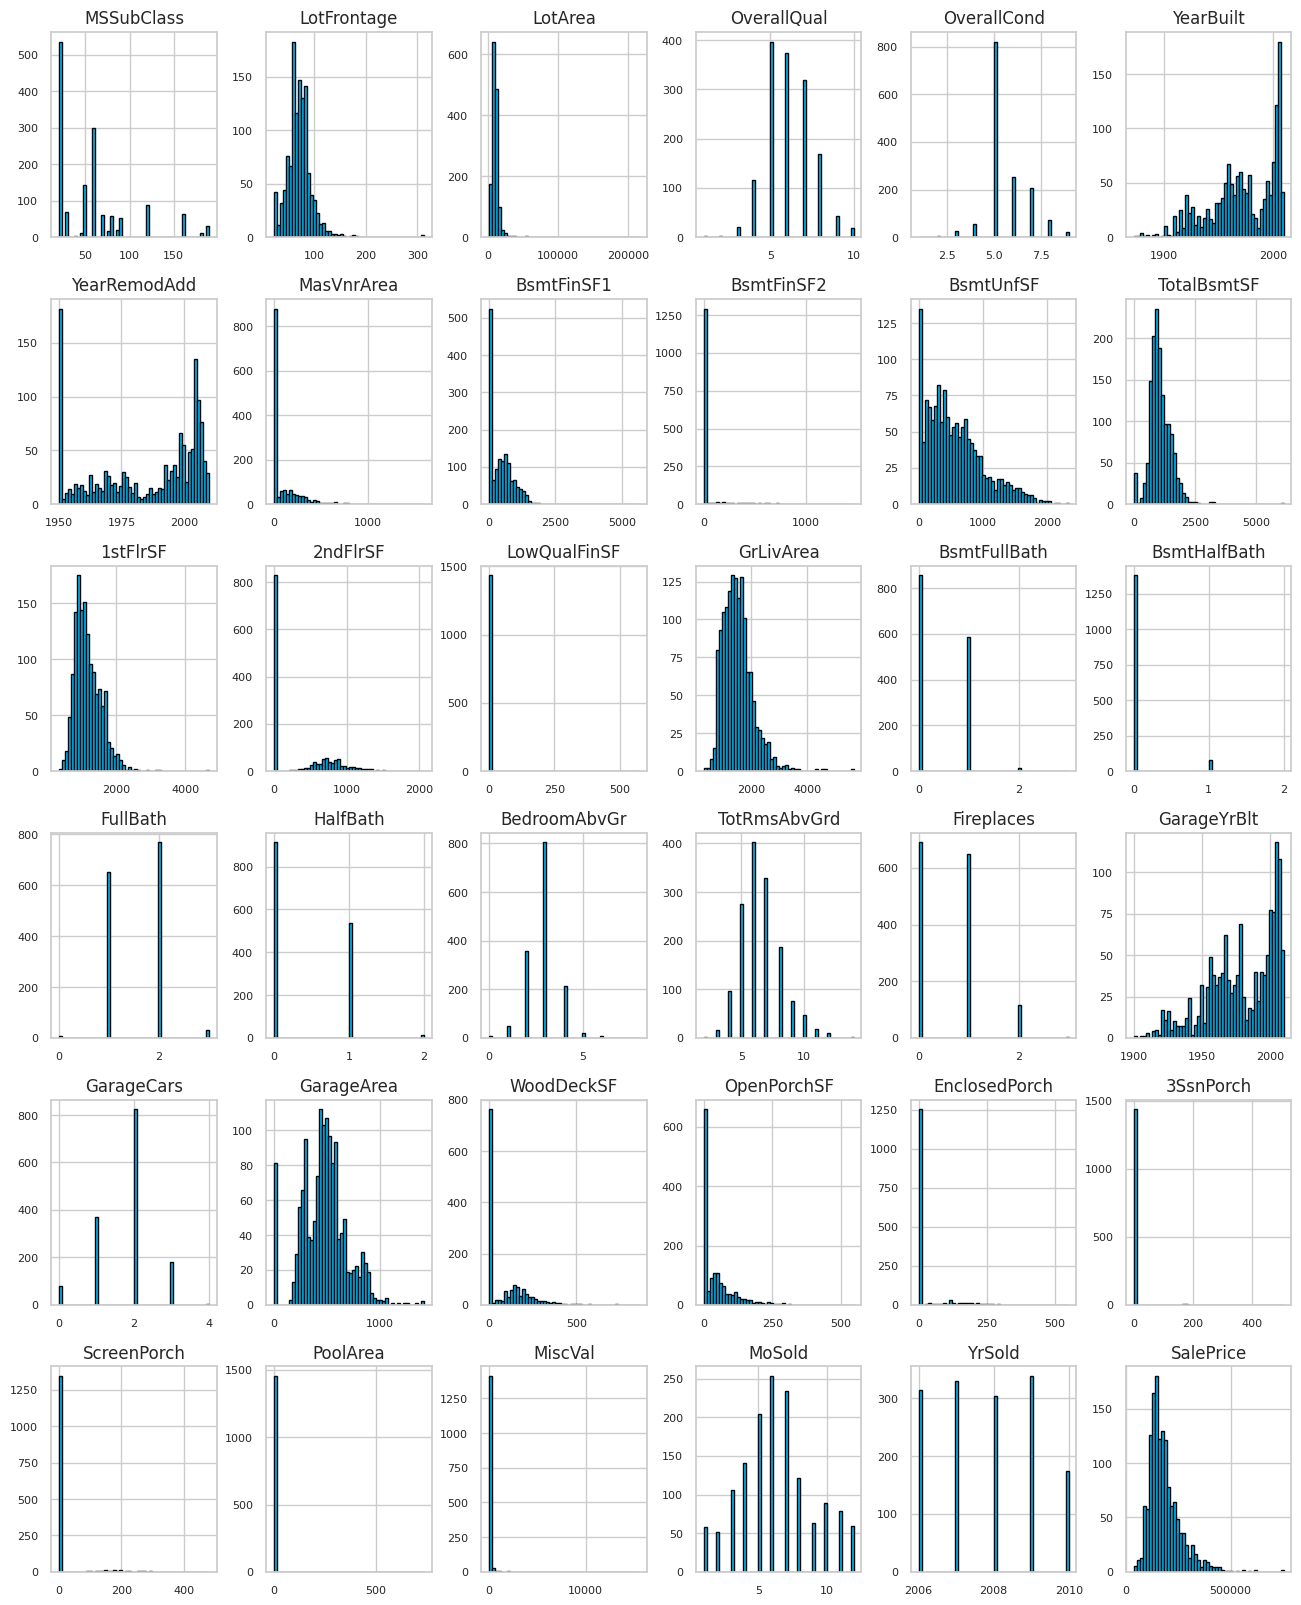

In [ ]:
# Plot the distribution of all the numerical data
# Check the normality, outliers, constant features, etc.
fig_ = df_train_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

*Check which to be removed using correlation*

#### a. Correlation Heatmap

Heatmap for all the remaining numerical data including the taget 'SalePrice'

In [ ]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
# Define correlation matrix
corr_matrix = df_train_num.corr()
corr_matrix

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.39    -0.14         0.03        -0.06   
LotFrontage         -0.39         1.00     0.43         0.25        -0.06   
LotArea             -0.14         0.43     1.00         0.11        -0.01   
OverallQual          0.03         0.25     0.11         1.00        -0.09   
OverallCond         -0.06        -0.06    -0.01        -0.09         1.00   
YearBuilt            0.03         0.12     0.01         0.57        -0.38   
YearRemodAdd         0.04         0.09     0.01         0.55         0.07   
MasVnrArea           0.02         0.19     0.10         0.41        -0.13   
BsmtFinSF1          -0.07         0.23     0.21         0.24        -0.05   
BsmtFinSF2          -0.07         0.05     0.11        -0.06         0.04   
BsmtUnfSF           -0.14         0.13    -0.00         0.31        -0.14   
TotalBsmtSF         -0.24         0.39     0.26         0.54        -0.17   
1stFlrSF            -0.25         0.46     0.30         0.48        -0.14   
2ndFlrSF             0.31         0.08     0.05         0.30         0.03   
LowQualFinSF         0.05         0.04     0.00        -0.03         0.03   
GrLivArea            0.07         0.40     0.26         0.59        -0.08   
BsmtFullBath         0.00         0.10     0.16         0.11        -0.05   
BsmtHalfBath        -0.00        -0.01     0.05        -0.04         0.12   
FullBath             0.13         0.20     0.13         0.55        -0.19   
HalfBath             0.18         0.05     0.01         0.27        -0.06   
BedroomAbvGr        -0.02         0.26     0.12         0.10         0.01   
TotRmsAbvGrd         0.04         0.35     0.19         0.43        -0.06   
Fireplaces          -0.05         0.27     0.27         0.40        -0.02   
GarageYrBlt          0.09         0.07    -0.02         0.55        -0.32   
GarageCars          -0.04         0.29     0.15         0.60        -0.19   
GarageArea          -0.10         0.34     0.18         0.56        -0.15   
WoodDeckSF          -0.01         0.09     0.17         0.24        -0.00   
OpenPorchSF         -0.01         0.15     0.08         0.31        -0.03   
EnclosedPorch       -0.01         0.01    -0.02        -0.11         0.07   
3SsnPorch           -0.04         0.07     0.02         0.03         0.03   
ScreenPorch         -0.03         0.04     0.04         0.06         0.05   
PoolArea             0.01         0.21     0.08         0.07        -0.00   
MiscVal             -0.01         0.00     0.04        -0.03         0.07   
MoSold              -0.01         0.01     0.00         0.07        -0.00   
YrSold              -0.02         0.01    -0.01        -0.03         0.04   
SalePrice           -0.08         0.35     0.26         0.79        -0.08   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.03          0.04        0.02       -0.07       -0.07   
LotFrontage         0.12          0.09        0.19        0.23        0.05   
LotArea             0.01          0.01        0.10        0.21        0.11   
OverallQual         0.57          0.55        0.41        0.24       -0.06   
OverallCond        -0.38          0.07       -0.13       -0.05        0.04   
YearBuilt           1.00          0.59        0.32        0.25       -0.05   
YearRemodAdd        0.59          1.00        0.18        0.13       -0.07   
MasVnrArea          0.32          0.18        1.00        0.26       -0.07   
BsmtFinSF1          0.25          0.13        0.26        1.00       -0.05   
BsmtFinSF2         -0.05         -0.07       -0.07       -0.05        1.00   
BsmtUnfSF           0.15          0.18        0.11       -0.50       -0.21   
TotalBsmtSF         0.39          0.29        0.36        0.52        0.10   
1stFlrSF            0.28          0.24        0.34        0.45        0.10   
2ndFlrSF            0.01          0.14        0.17       -0.14       -0.1

In [ ]:
# Replace correlation < |0.3| by 0 for a better visibility
# yg dicari dikorelasi yg mendekati 1 dan -1, klo lemah exclude aja, anggep 0
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
corr_matrix

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.39     0.00         0.00         0.00   
LotFrontage         -0.39         1.00     0.43         0.00         0.00   
LotArea              0.00         0.43     1.00         0.00         0.00   
OverallQual          0.00         0.00     0.00         1.00         0.00   
OverallCond          0.00         0.00     0.00         0.00         1.00   
YearBuilt            0.00         0.00     0.00         0.57        -0.38   
YearRemodAdd         0.00         0.00     0.00         0.55         0.00   
MasVnrArea           0.00         0.00     0.00         0.41         0.00   
BsmtFinSF1           0.00         0.00     0.00         0.00         0.00   
BsmtFinSF2           0.00         0.00     0.00         0.00         0.00   
BsmtUnfSF            0.00         0.00     0.00         0.31         0.00   
TotalBsmtSF          0.00         0.39     0.00         0.54         0.00   
1stFlrSF             0.00         0.46     0.00         0.48         0.00   
2ndFlrSF             0.31         0.00     0.00         0.00         0.00   
LowQualFinSF         0.00         0.00     0.00         0.00         0.00   
GrLivArea            0.00         0.40     0.00         0.59         0.00   
BsmtFullBath         0.00         0.00     0.00         0.00         0.00   
BsmtHalfBath         0.00         0.00     0.00         0.00         0.00   
FullBath             0.00         0.00     0.00         0.55         0.00   
HalfBath             0.00         0.00     0.00         0.00         0.00   
BedroomAbvGr         0.00         0.00     0.00         0.00         0.00   
TotRmsAbvGrd         0.00         0.35     0.00         0.43         0.00   
Fireplaces           0.00         0.00     0.00         0.40         0.00   
GarageYrBlt          0.00         0.00     0.00         0.55        -0.32   
GarageCars           0.00         0.00     0.00         0.60         0.00   
GarageArea           0.00         0.34     0.00         0.56         0.00   
WoodDeckSF           0.00         0.00     0.00         0.00         0.00   
OpenPorchSF          0.00         0.00     0.00         0.31         0.00   
EnclosedPorch        0.00         0.00     0.00         0.00         0.00   
3SsnPorch            0.00         0.00     0.00         0.00         0.00   
ScreenPorch          0.00         0.00     0.00         0.00         0.00   
PoolArea             0.00         0.00     0.00         0.00         0.00   
MiscVal              0.00         0.00     0.00         0.00         0.00   
MoSold               0.00         0.00     0.00         0.00         0.00   
YrSold               0.00         0.00     0.00         0.00         0.00   
SalePrice            0.00         0.35     0.00         0.79         0.00   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.00          0.00        0.00        0.00        0.00   
LotFrontage         0.00          0.00        0.00        0.00        0.00   
LotArea             0.00          0.00        0.00        0.00        0.00   
OverallQual         0.57          0.55        0.41        0.00        0.00   
OverallCond        -0.38          0.00        0.00        0.00        0.00   
YearBuilt           1.00          0.59        0.32        0.00        0.00   
YearRemodAdd        0.59          1.00        0.00        0.00        0.00   
MasVnrArea          0.32          0.00        1.00        0.00        0.00   
BsmtFinSF1          0.00          0.00        0.00        1.00        0.00   
BsmtFinSF2          0.00          0.00        0.00        0.00        1.00   
BsmtUnfSF           0.00          0.00        0.00       -0.50        0.00   
TotalBsmtSF         0.39          0.00        0.36        0.52        0.00   
1stFlrSF            0.00          0.00        0.34        0.45        0.00   
2ndFlrSF            0.00          0.00        0.00        0.00        0.0

In [ ]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

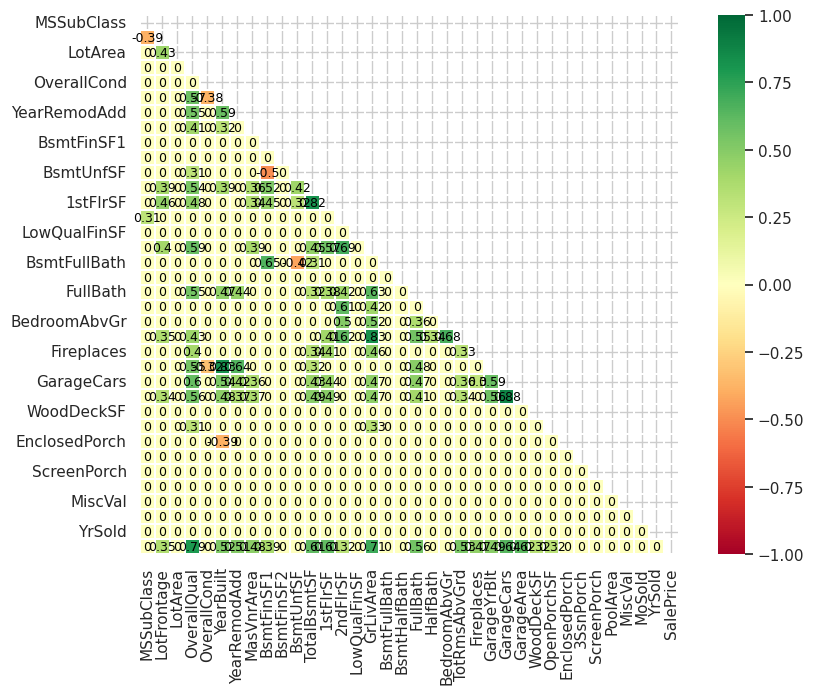

In [ ]:
# Choose the color map
cmap = "RdYlGn"

# Plot the heatmap
sns.heatmap(
    data=corr_matrix,
    mask=mask, # cover, not showing them which masked True
    vmax=1.0,
    vmin=-1.0,
    linewidths=0.1,
    annot_kws={
        "size": 9,
        "color": "black"
    },
    square=True,
    cmap=cmap,
    annot=True
);

In [ ]:
# Calculate correlation with 'SalePrice' for numerical features => targetnya
correlation_with_saleprice = df_train_num.corr()["SalePrice"][:-1]

# Identify strongly correlated features (correlation coefficient >= 0.5)
strong_correlations = (
    correlation_with_saleprice[abs(correlation_with_saleprice) >= 0.5]
    .sort_values(ascending=False)
)
print(f"{len(strong_correlations)} strongly correlated features with SalePrice:")
print(strong_correlations)

print("\n-------------------------#######-------------------------\n")

# Identify moderately correlated features (0.3 <= correlation coefficient < 0.5)
moderate_correlations = (
    correlation_with_saleprice[(abs(correlation_with_saleprice) < 0.5) \
    & (abs(correlation_with_saleprice) >= 0.3)]
    .sort_values(ascending=False)
)
print(f"{len(moderate_correlations)} moderately correlated features with SalePrice:")
print(moderate_correlations)

10 strongly correlated features with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

-------------------------#######-------------------------

8 moderately correlated features with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


In [ ]:
strong_correlations.index.tolist()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

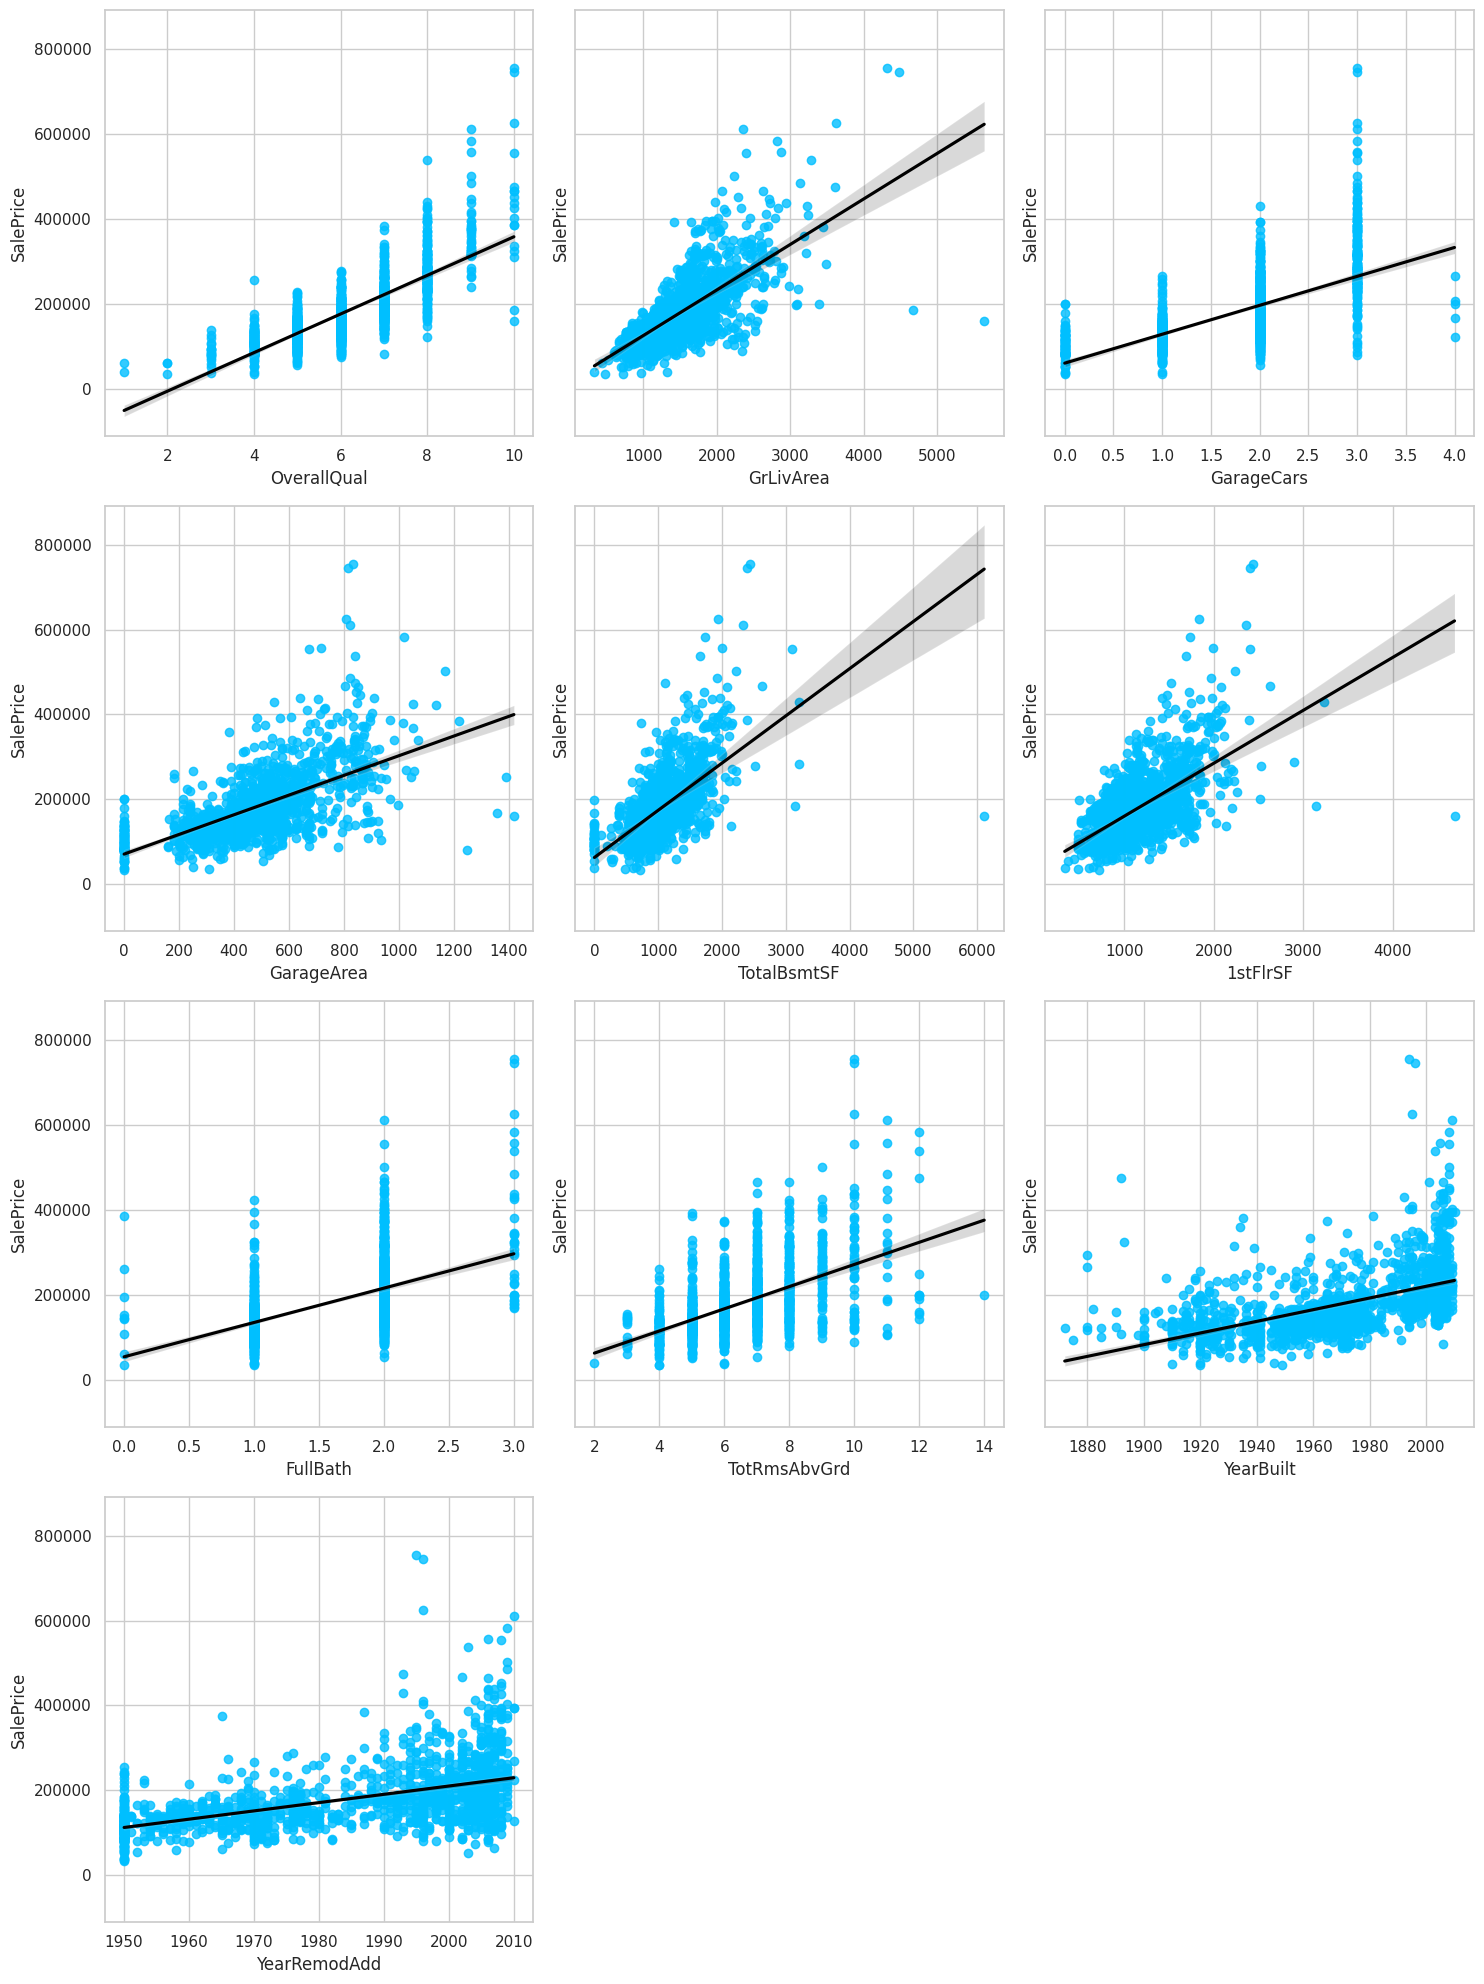

In [ ]:
# Features with high correlation (higher than 0.5)
strong_features = strong_correlations.index.tolist()
strong_features.append("SalePrice")
df_strong_features = df_train_num.loc[:, strong_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(strong_features) -1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(strong_features) - 1)


fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(len(strong_features) - 1):
    sns.regplot(
        x=strong_features[i],
        y="SalePrice",
        data=df_strong_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(strong_features[i]) # Set xlabel for each subplot


# Turn off any unused subplots
for i in range(len(strong_features) - 1, len(axes)):
    axes[i].set_axis_off()


plt.tight_layout()
plt.show()

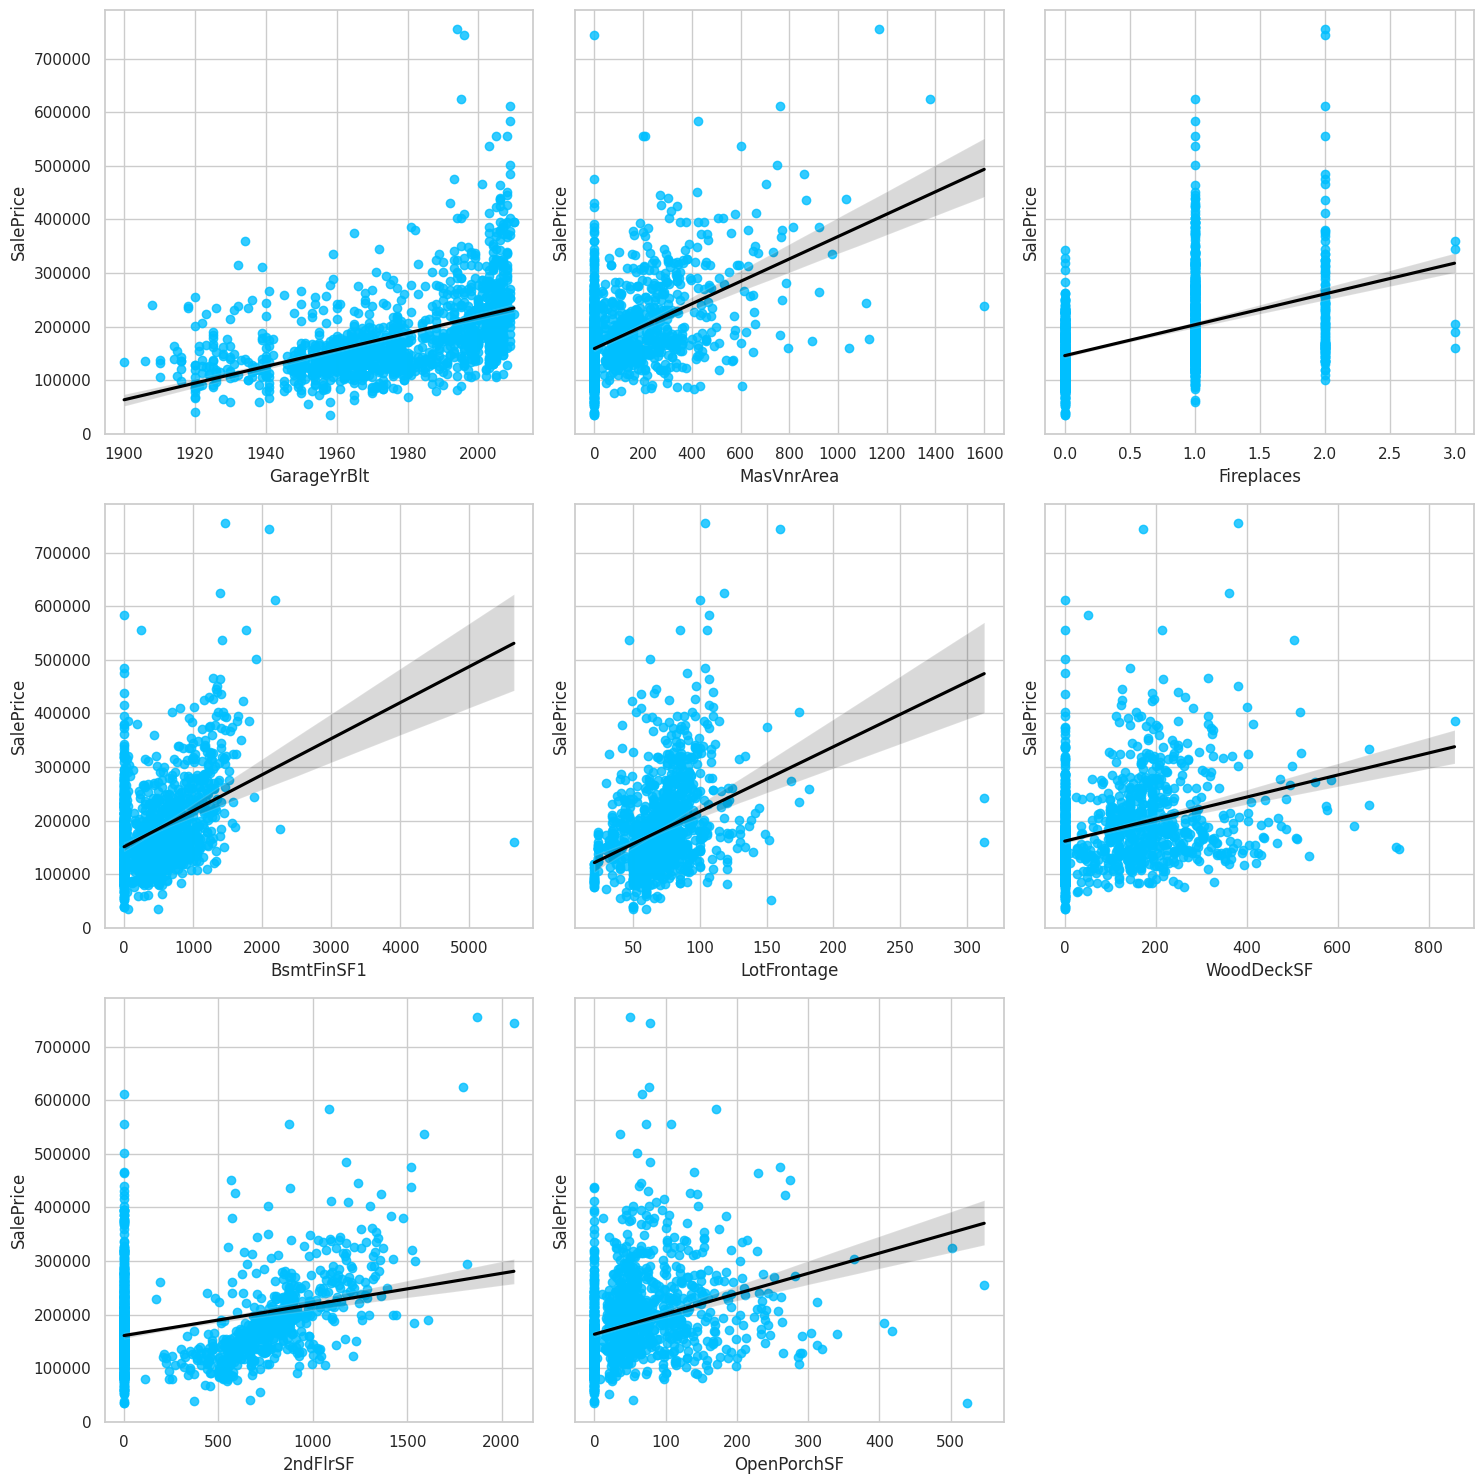

In [ ]:
# Features with moderate correlation (0.3 <= correlation coefficient < 0.5)
moderate_features = moderate_correlations.index.tolist()
moderate_features.append("SalePrice")
df_moderate_features = df_train_num.loc[:, moderate_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(moderate_features) - 1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(moderate_features) - 1)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(len(moderate_features) - 1):
    sns.regplot(
        x=moderate_features[i],
        y="SalePrice",
        data=df_moderate_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(moderate_features[i])  # Set xlabel for each subplot

# Turn off any unused subplots
for i in range(len(moderate_features) - 1, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
# Define the list of numerical features to keep
# ambil yg moderate ama strong correlated
moderate_features = moderate_correlations.index.tolist()
list_of_numerical_features = strong_features[:-1] + moderate_features

# Let's select these features from our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set
df_test_num = df_test.loc[:, list_of_numerical_features]

In [ ]:
list_of_numerical_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

In [ ]:
df_train_num.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [ ]:
df_test_num.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [ ]:
set(df_train_num.columns) == set(df_test_num.columns)

True

### 1.1.2. Missing data of Numerical features

#### a. Train Set

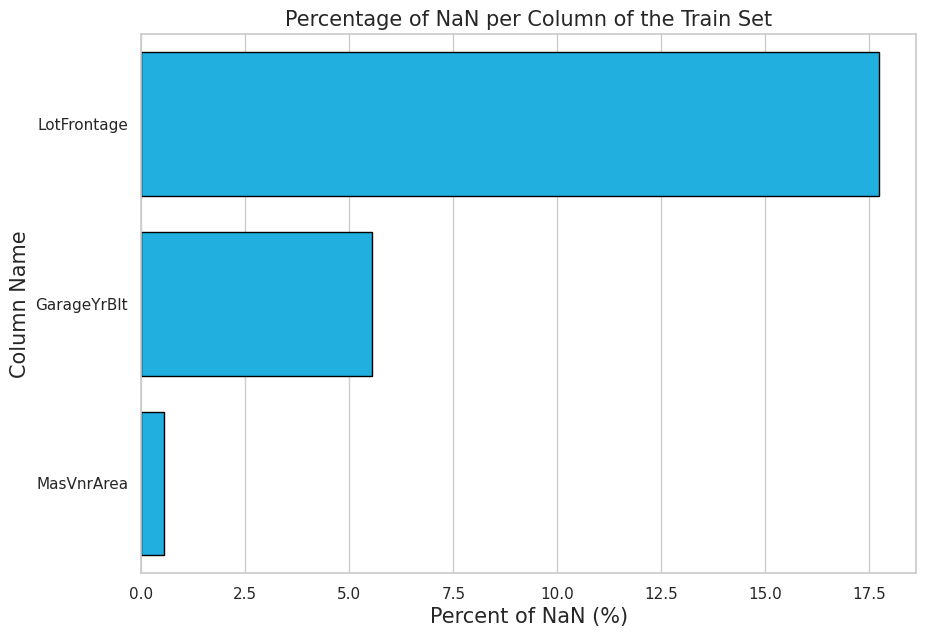

In [ ]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percentage of NaN per Column of the Train Set", fontsize=fontsize)
p.set_xlabel("Percent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name", fontsize=fontsize);

*yang null >5% bisa diremove*

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median") # replace null values dengan median

df_train_imputed = pd.DataFrame(
    my_imputer.fit_transform(df_train_num)
)

df_train_imputed.head()

0        1    2      3        4        5    6    7        8        9   \
0 7.00 1,710.00 2.00 548.00   856.00   856.00 2.00 8.00 2,003.00 2,003.00   
1 6.00 1,262.00 2.00 460.00 1,262.00 1,262.00 2.00 6.00 1,976.00 1,976.00   
2 7.00 1,786.00 2.00 608.00   920.00   920.00 2.00 6.00 2,001.00 2,002.00   
3 7.00 1,717.00 3.00 642.00   756.00   961.00 1.00 7.00 1,915.00 1,970.00   
4 8.00 2,198.00 3.00 836.00 1,145.00 1,145.00 2.00 9.00 2,000.00 2,000.00   

        10     11   12     13    14     15       16    17  
0 2,003.00 196.00 0.00 706.00 65.00   0.00   854.00 61.00  
1 1,976.00   0.00 1.00 978.00 80.00 298.00     0.00  0.00  
2 2,001.00 162.00 1.00 486.00 68.00   0.00   866.00 42.00  
3 1,998.00   0.00 1.00 216.00 60.00   0.00   756.00 35.00  
4 2,000.00 350.00 1.00 655.00 84.00 192.00 1,053.00 84.00

Use "median" if skewed data, "mean" if normal

In [ ]:
df_train_imputed.columns = df_train_num.columns
df_train_imputed.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0         7.00   1,710.00        2.00      548.00       856.00    856.00   
1         6.00   1,262.00        2.00      460.00     1,262.00  1,262.00   
2         7.00   1,786.00        2.00      608.00       920.00    920.00   
3         7.00   1,717.00        3.00      642.00       756.00    961.00   
4         8.00   2,198.00        3.00      836.00     1,145.00  1,145.00   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  MasVnrArea  \
0      2.00          8.00   2,003.00      2,003.00     2,003.00      196.00   
1      2.00          6.00   1,976.00      1,976.00     1,976.00        0.00   
2      2.00          6.00   2,001.00      2,002.00     2,001.00      162.00   
3      1.00          7.00   1,915.00      1,970.00     1,998.00        0.00   
4      2.00          9.00   2,000.00      2,000.00     2,000.00      350.00   

   Fireplaces  BsmtFinSF1  LotFrontage  WoodDeckSF  2ndFlrSF  OpenPorchSF  
0        0.00      706.00        65.00        0.00    854.00        61.00  
1        1.00      978.00        80.00      298.00      0.00         0.00  
2        1.00      486.00        68.00        0.00    866.00        42.00  
3        1.00      216.00        60.00        0.00    756.00        35.00  
4        1.00      655.00        84.00      192.00  1,053.00        84.00

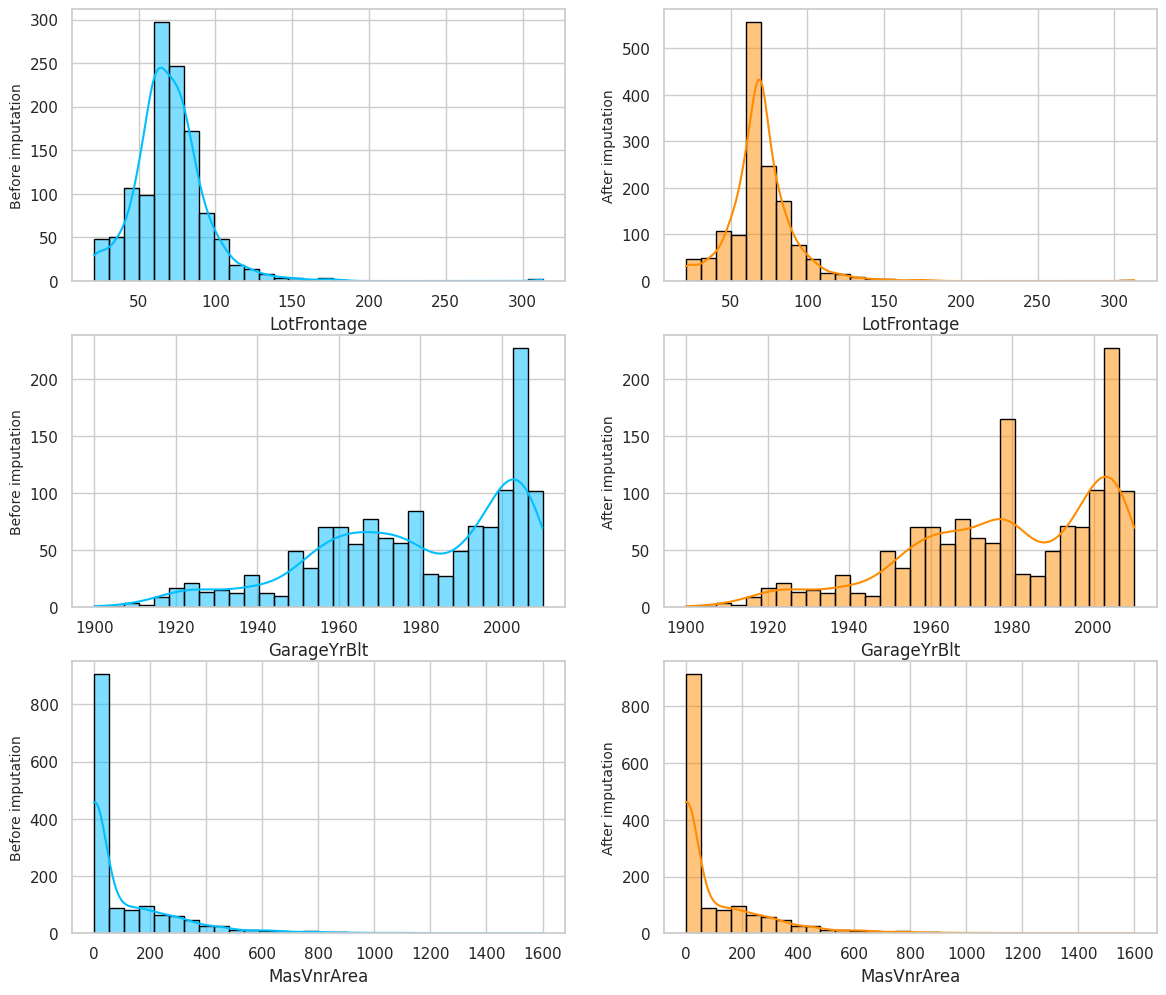

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)
fontsize=10
# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(
        ax=axes[fig_pos, 0],
        x=df_train_num[feature],
        kde=True,
        bins=30,
        color="deepskyblue",
        edgecolor="black"
    )
    p.set_ylabel(f"Before imputation", fontsize=fontsize)

    # after imputation
    q = sns.histplot(
        ax=axes[fig_pos, 1],
        x=df_train_imputed[feature],
        kde=True,
        bins=30,
        color="darkorange",
        edgecolor="black"
    )
    q.set_ylabel(f"After imputation", fontsize=fontsize)

For "LotFrontage" and "GarageYrBlt" the distributions have changed after imputations. There is an over-representation of the median class compare ot the original distribution.

However, the distribution remains the same for "MasVnrArea". Thus, to avoid any error related to the imputation we **keep** only the feature "MasVnrArea" for our analyses.

In [ ]:
# Drop 'LotFrontage' and 'GarageYrBlt'
df_train_imputed.drop(
    columns=["LotFrontage", "GarageYrBlt"],
    inplace=True
)

df_train_imputed.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0         7.00   1,710.00        2.00      548.00       856.00    856.00   
1         6.00   1,262.00        2.00      460.00     1,262.00  1,262.00   
2         7.00   1,786.00        2.00      608.00       920.00    920.00   
3         7.00   1,717.00        3.00      642.00       756.00    961.00   
4         8.00   2,198.00        3.00      836.00     1,145.00  1,145.00   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  \
0      2.00          8.00   2,003.00      2,003.00      196.00        0.00   
1      2.00          6.00   1,976.00      1,976.00        0.00        1.00   
2      2.00          6.00   2,001.00      2,002.00      162.00        1.00   
3      1.00          7.00   1,915.00      1,970.00        0.00        1.00   
4      2.00          9.00   2,000.00      2,000.00      350.00        1.00   

   BsmtFinSF1  WoodDeckSF  2ndFlrSF  OpenPorchSF  
0      706.00        0.00    854.00        61.00  
1      978.00      298.00      0.00         0.00  
2      486.00        0.00    866.00        42.00  
3      216.00        0.00    756.00        35.00  
4      655.00      192.00  1,053.00        84.00

#### b. Test Set

In [ ]:
# Drop the same features from test set as for the train set
df_test_num.drop(
    columns=["LotFrontage", "GarageYrBlt"],
    inplace=True
)

Text(0, 0.5, 'Column Name')

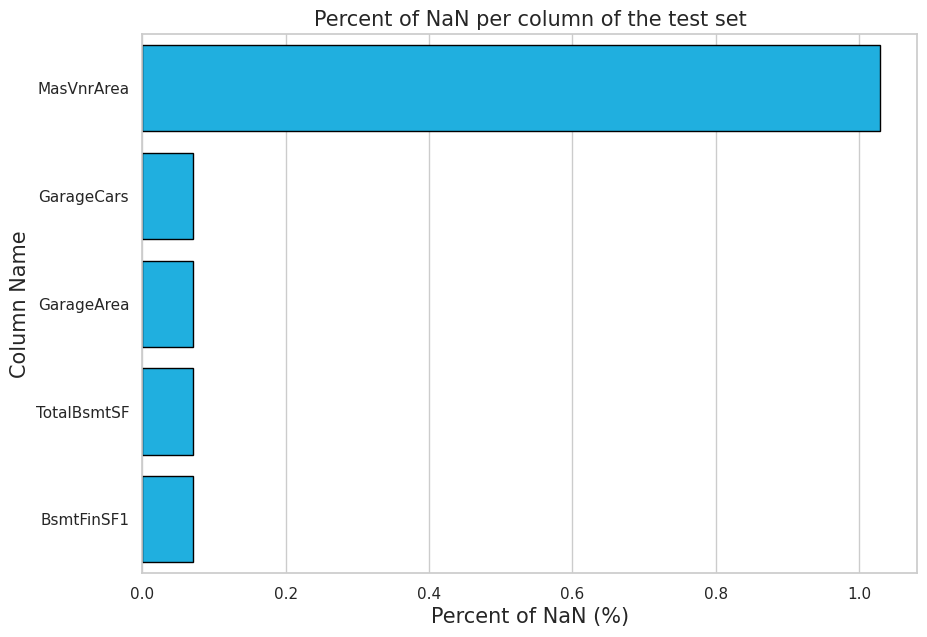

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percent of NaN per column of the test set", fontsize=fontsize)
p.set_xlabel("Percent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name", fontsize=fontsize)

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(
    my_imputer.fit_transform(df_test_num)
)
df_test_imputed.columns = df_test_num.columns

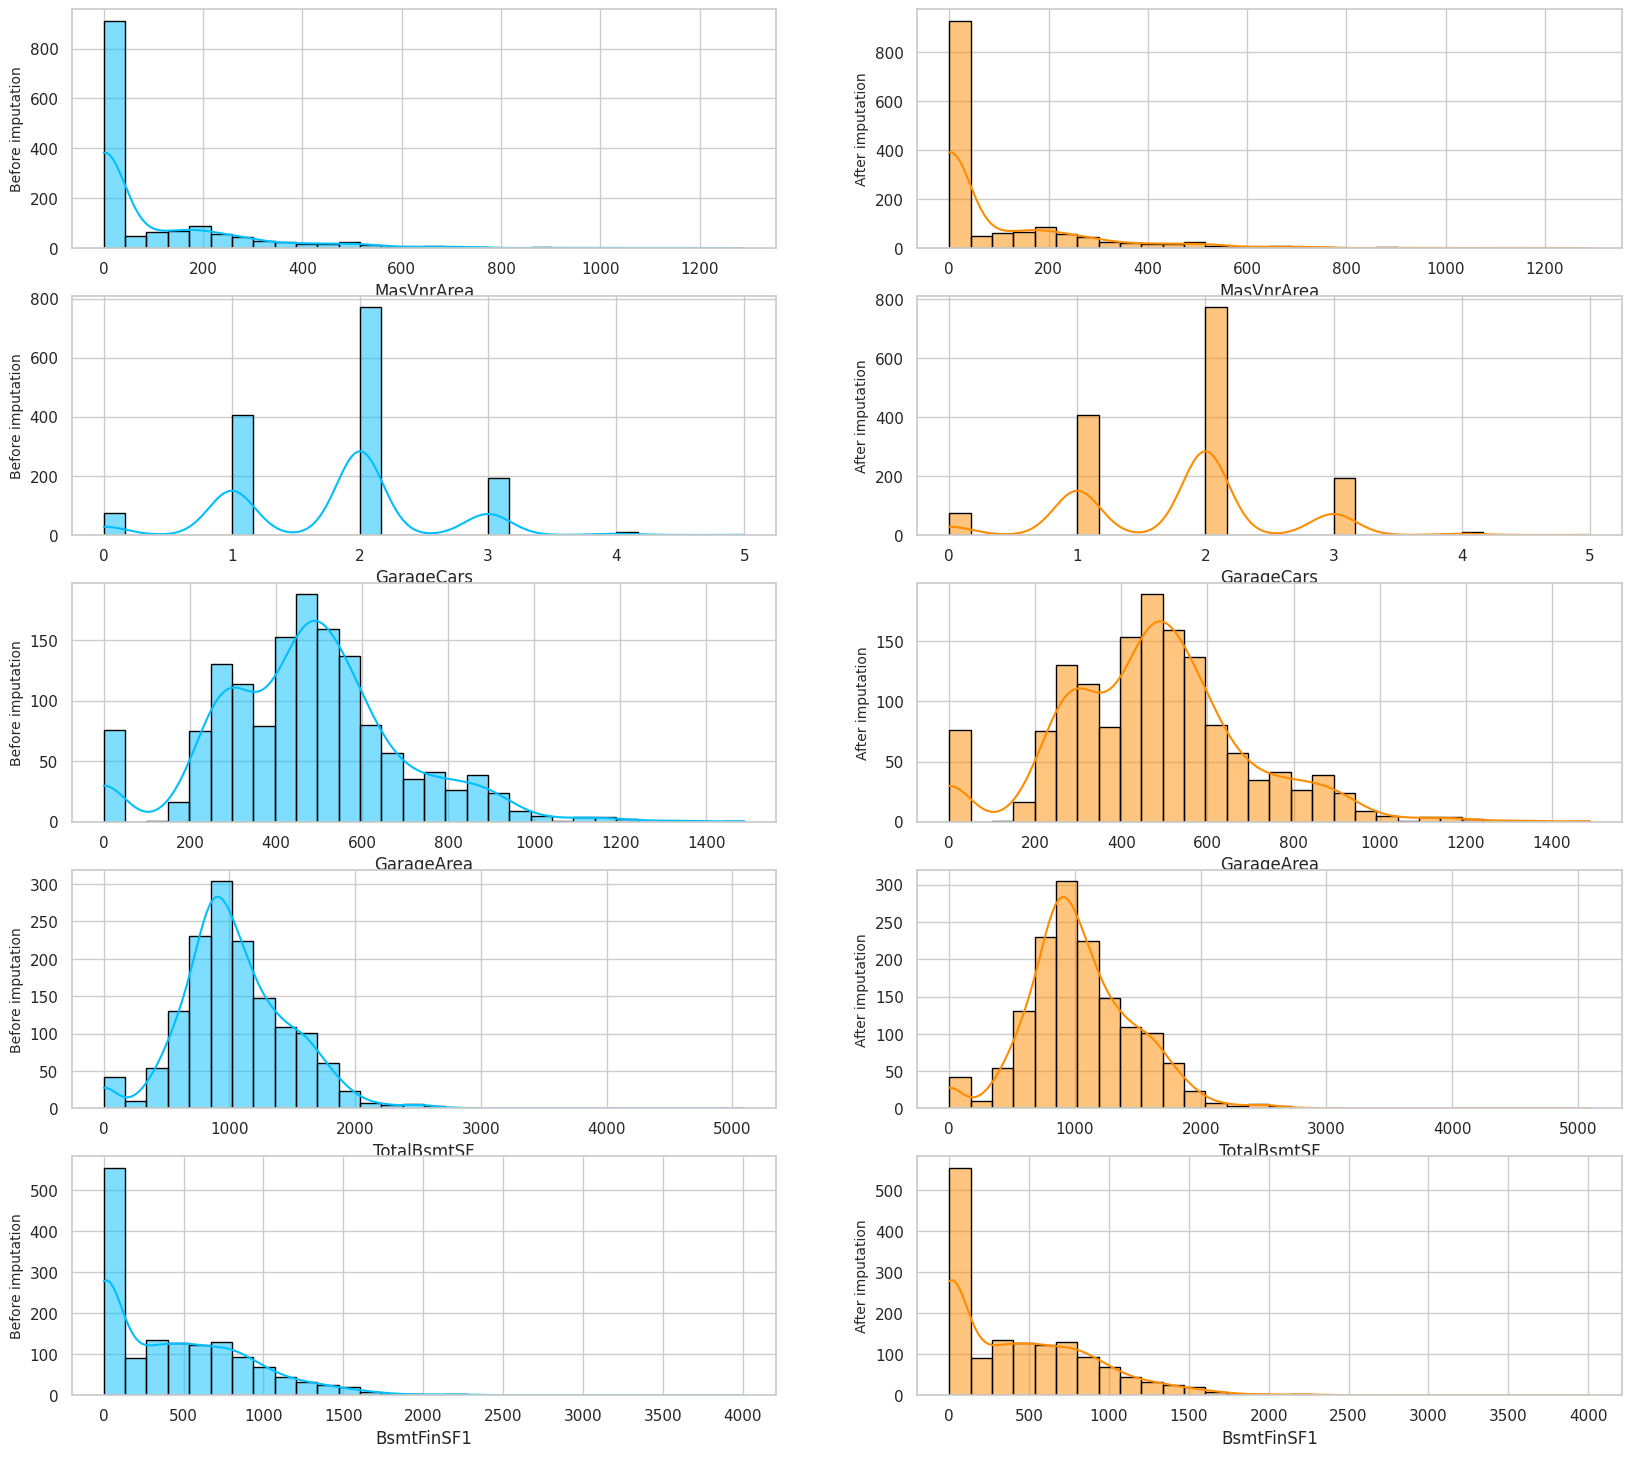

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize":(20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)
fontsize=10

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(
        ax=axes[fig_pos, 0],
        x=df_test_num[feature],
        kde=True,
        bins=30,
        color="deepskyblue",
        edgecolor="black"
    )
    p.set_ylabel(f"Before imputation", fontsize=fontsize)

    # after imputation
    q = sns.histplot(
        ax=axes[fig_pos, 1],
        x=df_test_imputed[feature],
        kde=True,
        bins=30,
        color="darkorange",
        edgecolor="black"
    )
    q.set_ylabel(f"After imputation", fontsize=fontsize)

The percentage of NaN in each of these fetaures did not exceed 1.5%.

Thus, by imputing these missing data, few errors were introduced and the distributions are similar before and after imputation.

## 1.2. Categorical Features

### 1.2.1. Explore and Clean Categorical Features

In [ ]:
# Categorical to Quantitative relationship

# categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"] # -->list comprehension
# for-loop
categorical_features = []
for feat, feat_type in zip(df_train.columns, df_train.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

# Include target variable
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

In [ ]:
display(df_train_categ.head())

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
0    NaN   NaN         NaN       WD        Normal    208500  
1    NaN   NaN         NaN       WD        Normal    181500  
2    NaN   NaN         NaN       WD        Normal    223500  
3    NaN   NaN         NaN       WD       Abnorml    140000  
4    NaN   NaN         NaN       WD        Normal    250000  

[5 rows x 44 columns]

In [ ]:
display(df_test_categ.head())

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
3      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
4      StoneBr       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN  MnPrv         NaN       WD        Normal  
1          Y    NaN    NaN        Gar2       WD        Normal  
2          Y    NaN  MnPrv         NaN       WD        Normal  
3          Y    NaN    NaN         NaN       WD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

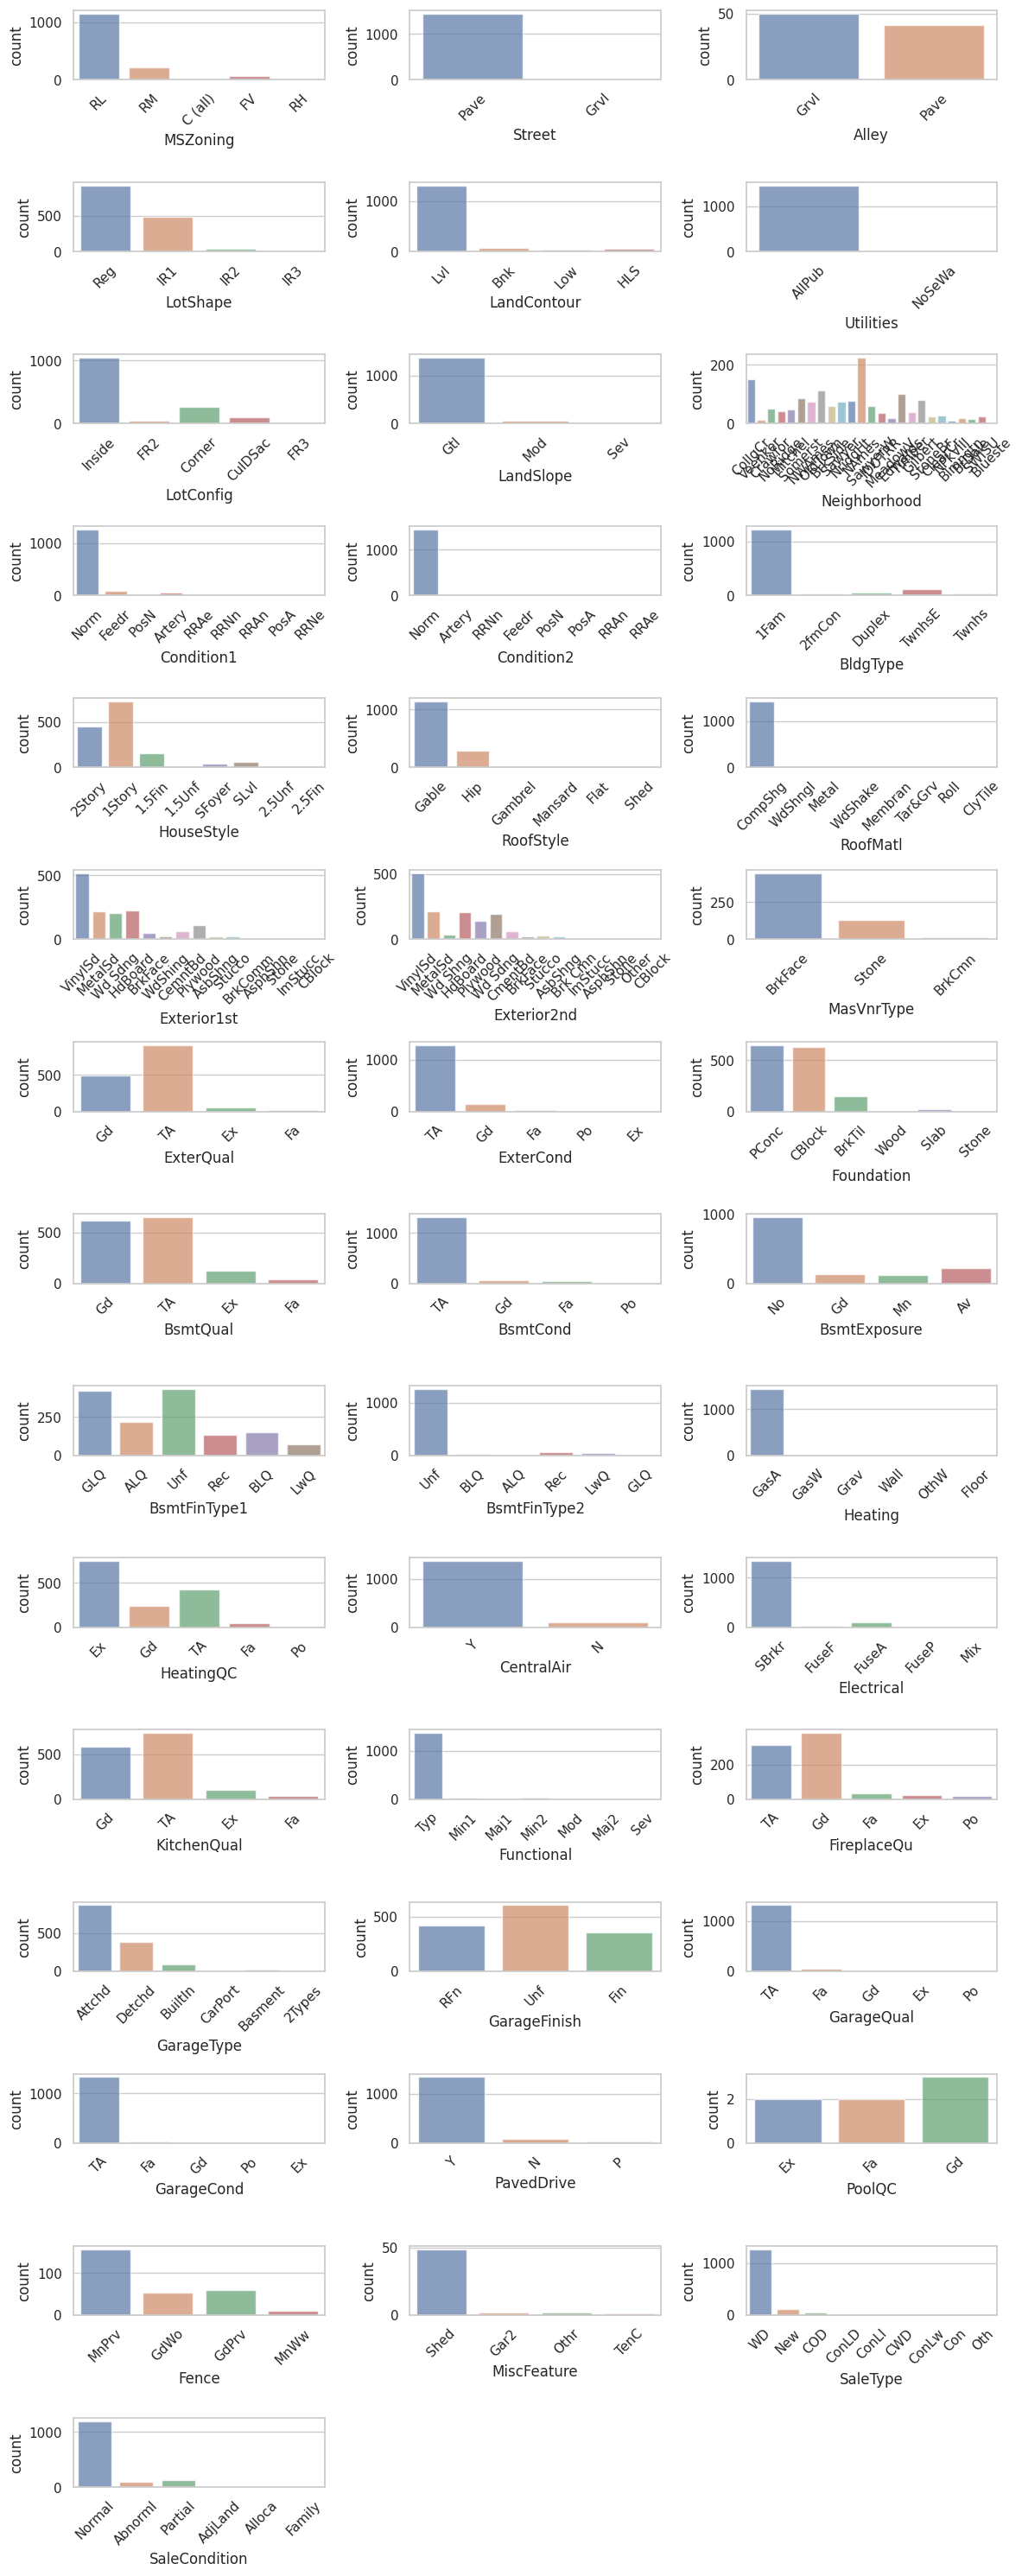

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    nrows=round(len(df_train_categ.columns) / 3),
    ncols=3,
    figsize=(12, 30)
)

for i, ax in enumerate(axes.flatten()):  # Iterate through flattened axes array
    if i < (len(df_train_categ.columns)-1): # -1 because we exclude SalePrice

        sns.countplot(
            x=df_train_categ.columns[i],
            alpha=0.7,
            data=df_train_categ,
            palette="deep",
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()

By looking closely at each of the count plots we can notice that for some categorical feature the observation are concentrated in a single level of the category.

These features are less informative for our model, so it would be better to remove them.

In [ ]:
# Drop some categorical 'non-informative' features from train set
columns_to_drop = [
    "Street",
    "Alley", # the total data contain alley is very small (<5%)
    "LandContour",
    "Utilities",
    "LandSlope",
    "Condition2",
    "RoofMatl",
    "ExterCond",
    "BsmtFinType2",
    "Heating",
    "CentralAir",
    "Functional",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "PavedDrive",
    "MiscFeature",
    "SaleType",
]

In [ ]:
# Train Set
df_train_categ.drop(
    columns=columns_to_drop,
    inplace=True
)

# Test Set
df_test_categ.drop(
    columns=columns_to_drop,
    inplace=True
)

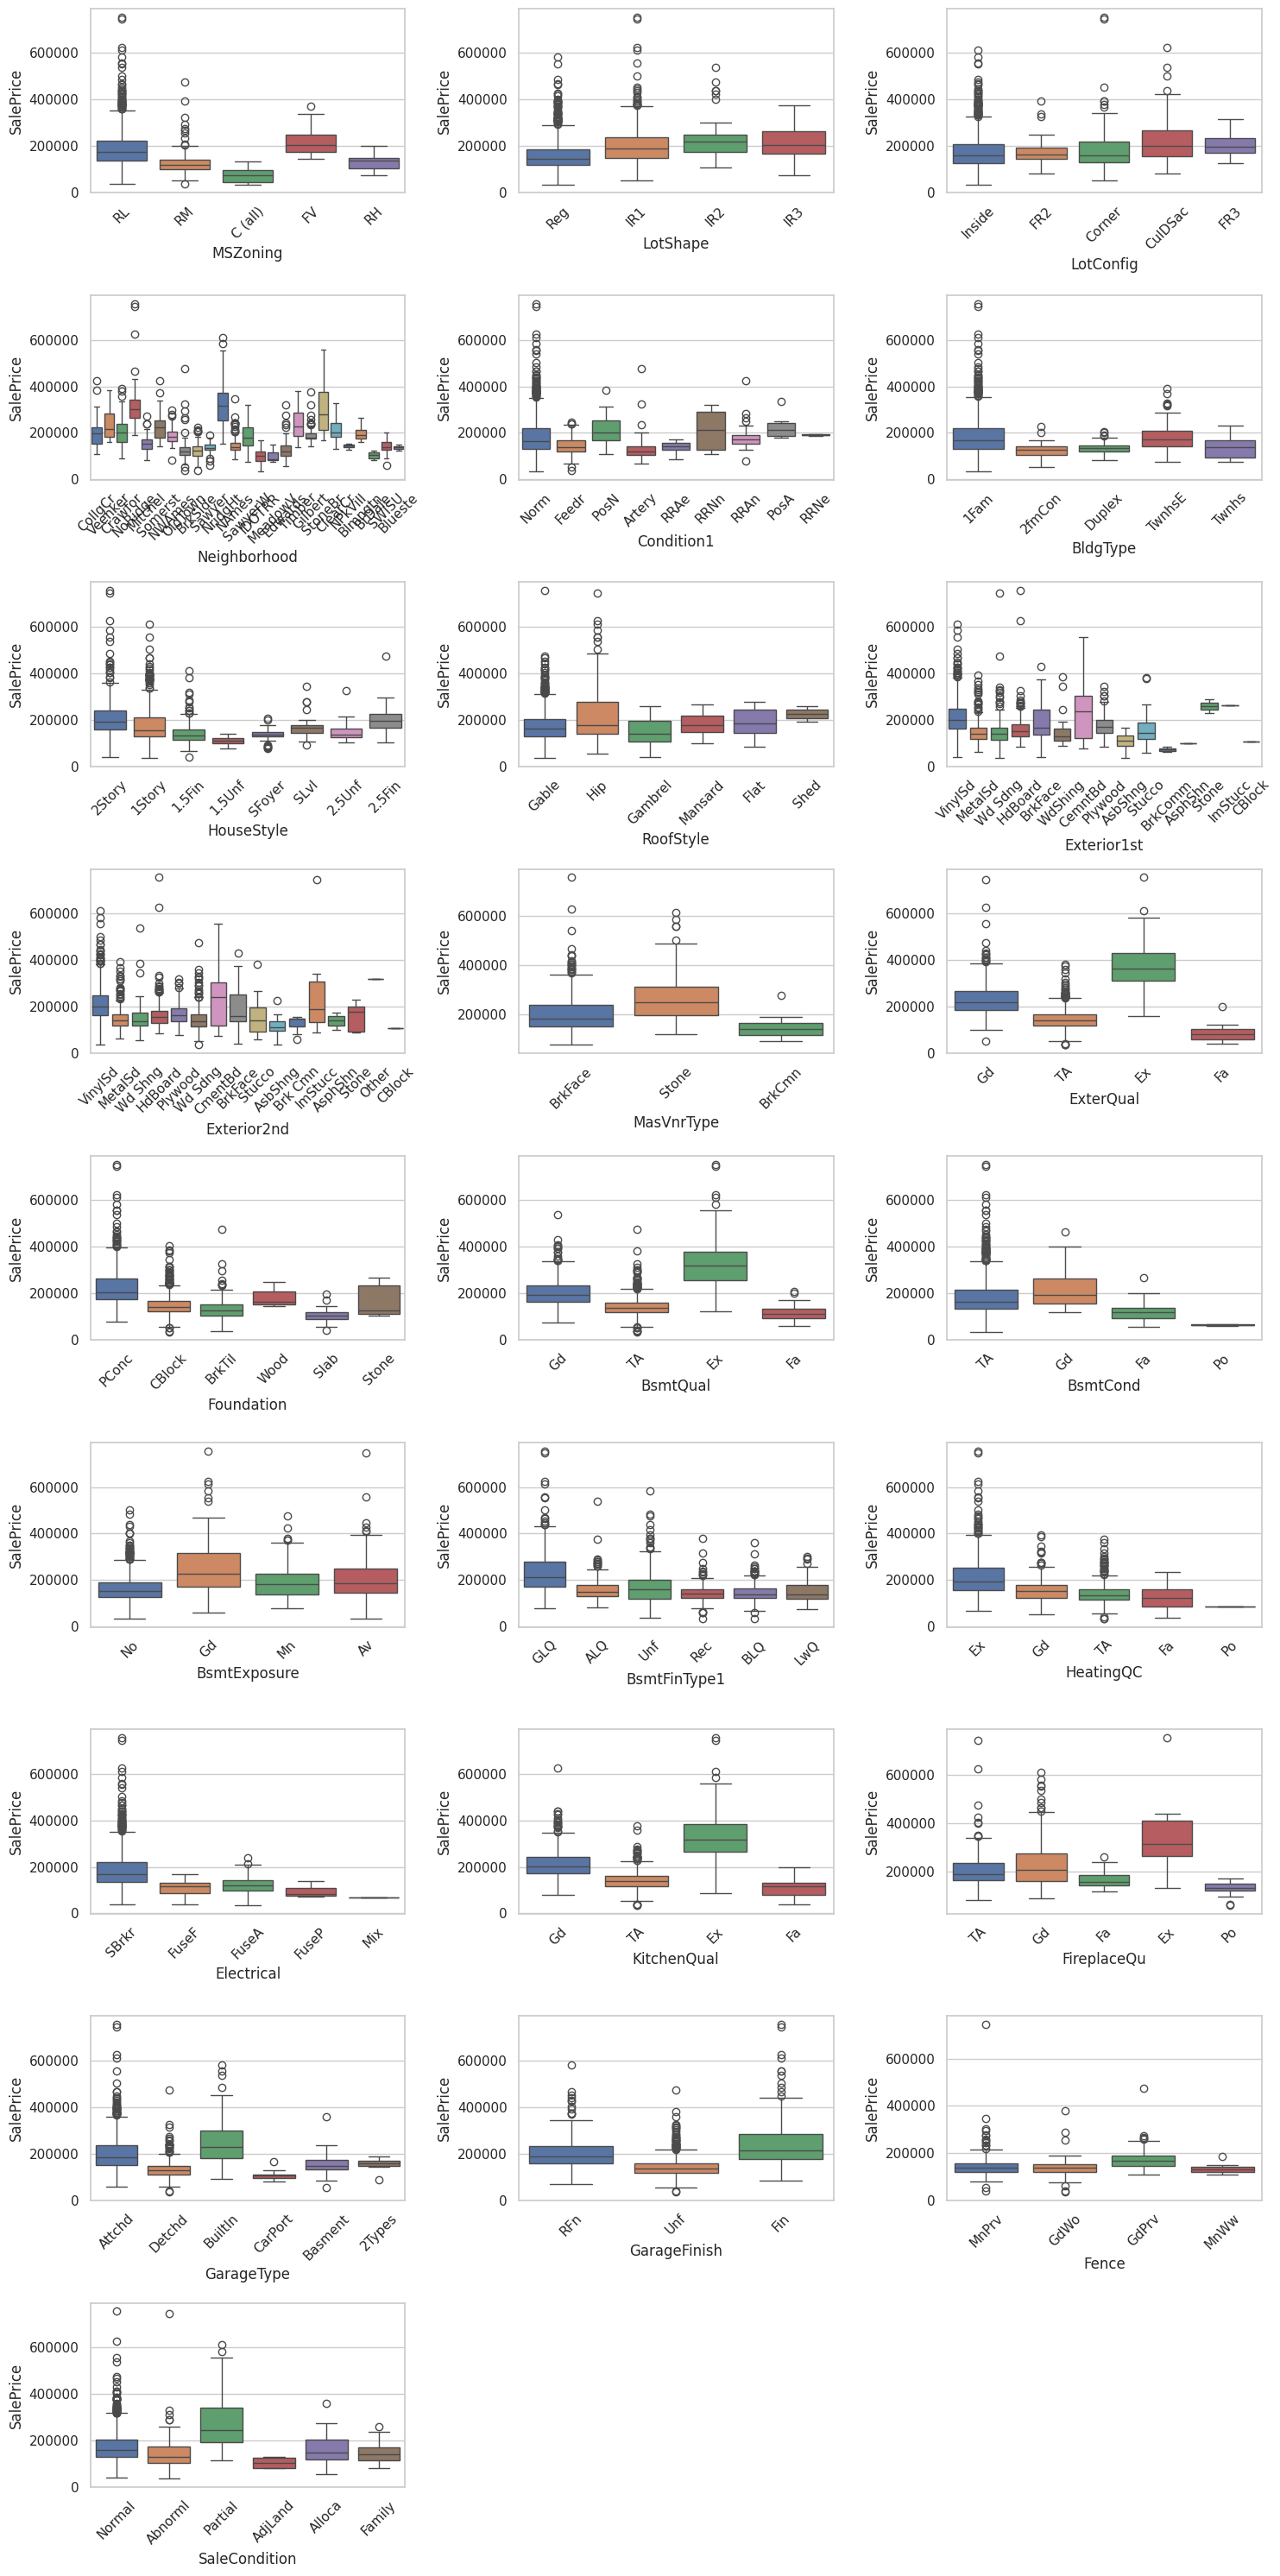

In [ ]:
# With the boxplot we can see the variation of the target 'SalePrice'
# in each of the categorical features

fig, axes = plt.subplots(
    nrows=round(len(df_train_categ.columns)/3),
    ncols=3,
    figsize=(15, 30)
)

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:

        sns.boxplot(
            x=df_train_categ.columns[i],
            y="SalePrice",
            data=df_train_categ,
            palette="deep",
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()

Some of these features seem to be codependent such as:
- 'Exterior1st' & 'Exterior2nd',
- 'ExterQual' & 'MasVnrType'
- 'BsmtQual' & 'BsmtCond',
- etc.

So let's plot the contingency table and perform the Chi square test in order to identify these codependency

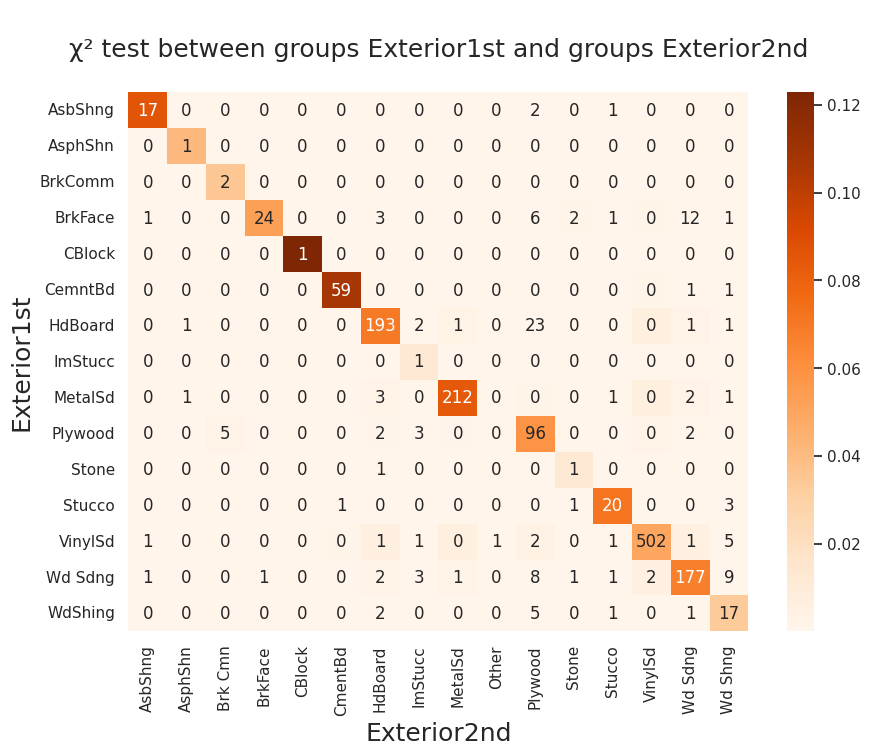

p-value of the ChiSq Test bewteen Exterior1st and Exterior2nd is:
0.0 



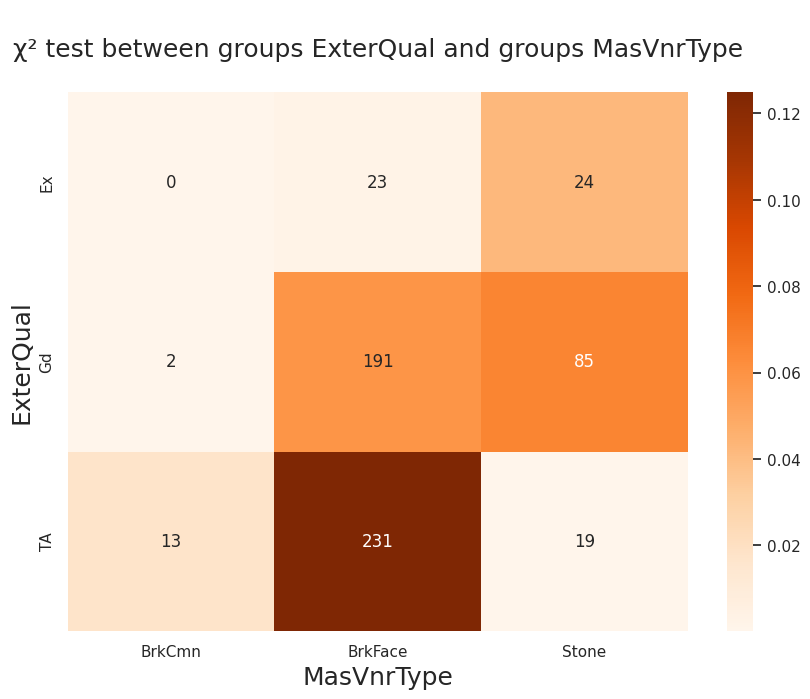

p-value of the ChiSq Test bewteen ExterQual and MasVnrType is:
1.1626591994363518e-15 



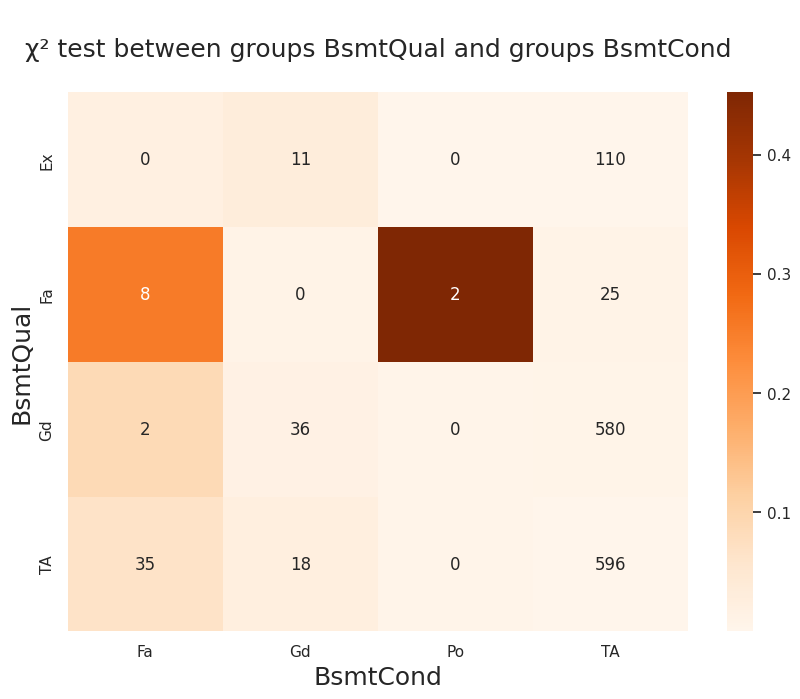

p-value of the ChiSq Test bewteen BsmtQual and BsmtCond is:
1.9371809126533347e-31 



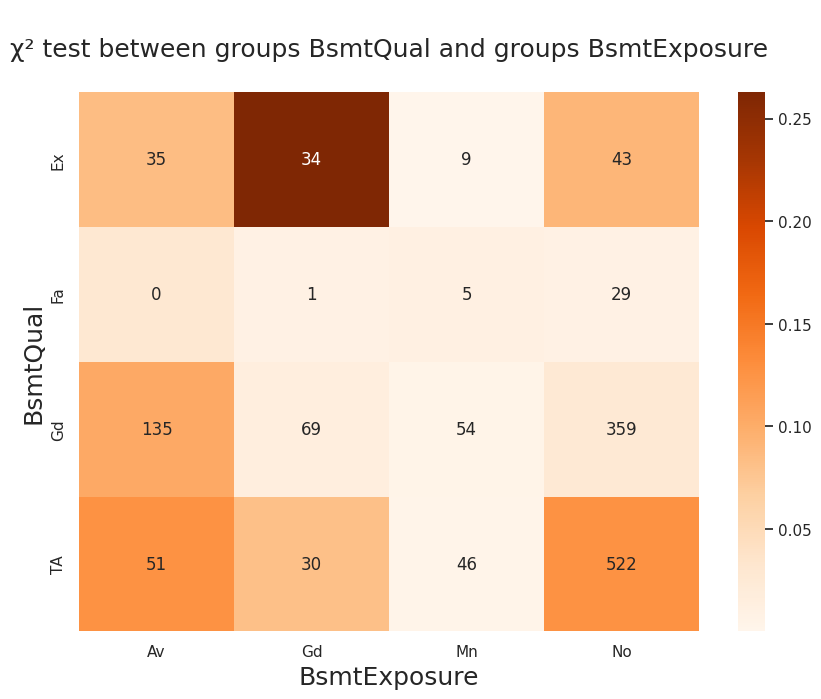

p-value of the ChiSq Test bewteen BsmtQual and BsmtExposure is:
3.879215036512606e-32 



In [ ]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i,
        columns=j,
        aggfunc=len,
        margins=True,
        margins_name="Total"
    )
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(
        table.iloc[:-1, :-1],
        annot=c.iloc[:-1, :-1],
        fmt=".0f", cmap="Oranges"
    )
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i],
        columns=df_train_categ[j]
    )
    ChiSqResult = chi2_contingency(CrosstabResult)

    # P-Value is the Probability of H0 being True
    print(f"p-value of the ChiSq Test bewteen {i} and {j} is:")
    print(ChiSqResult[1], "\n")

Dalam analisis uji chi-square, indikasi bahwa dua atau lebih variabel kategorikal memiliki hubungan erat adalah ketika nilai-nilai yang diamati dalam contingency table berbeda secara signifikan dari nilai-nilai yang diharapkan jika tidak ada hubungan antara variabel-variabel tersebut.

- Hipotesis Awal (Null Hypothesis, H0):
Hipotesis awal adalah bahwa **tidak ada hubungan** antara dua atau lebih variabel kategorikal. Dinyatakan sebagai "Tidak ada perbedaan antara variabel-variabel yang diamati dan yang diharapkan jika tidak ada hubungan antara mereka."

- Hipotesis Alternatif (Alternative Hypothesis, Ha):
Hipotesis alternatif menyatakan bahwa **ada hubungan** antara dua atau lebih variabel kategorikal. Dinyatakan sebagai "Ada perbedaan antara variabel-variabel yang diamati dan yang diharapkan jika tidak ada hubungan antara mereka."


Jika p-value lebih kecil dari tingkat signifikansi yang ditetapkan, maka kita akan menolak hipotesis nol dan menerima hipotesis alternatif. Namun, jika p-value lebih besar dari tingkat signifikansi, kita gagal menolak hipotesis nol.

p-value is significant for all tests so there is some co-dependence between these variables.

For this we will drop:
- "Exterior2nd",
- "MasVnrType",
- "BsmtCond",
- "BsmtExposure"

In [ ]:
Y

['Exterior2nd', 'MasVnrType', 'BsmtCond', 'BsmtExposure']

In [ ]:
# Let's drop the one of each co-dependent variables

# Train set
df_train_categ.drop(
    columns=Y,
    inplace=True
)

# Test set
df_test_categ.drop(
    columns=Y,
    inplace=True
)

### 1.2.2. Missing Data of Categorical Features

#### a. Train Set

Text(0, 0.5, 'Column Name\n')

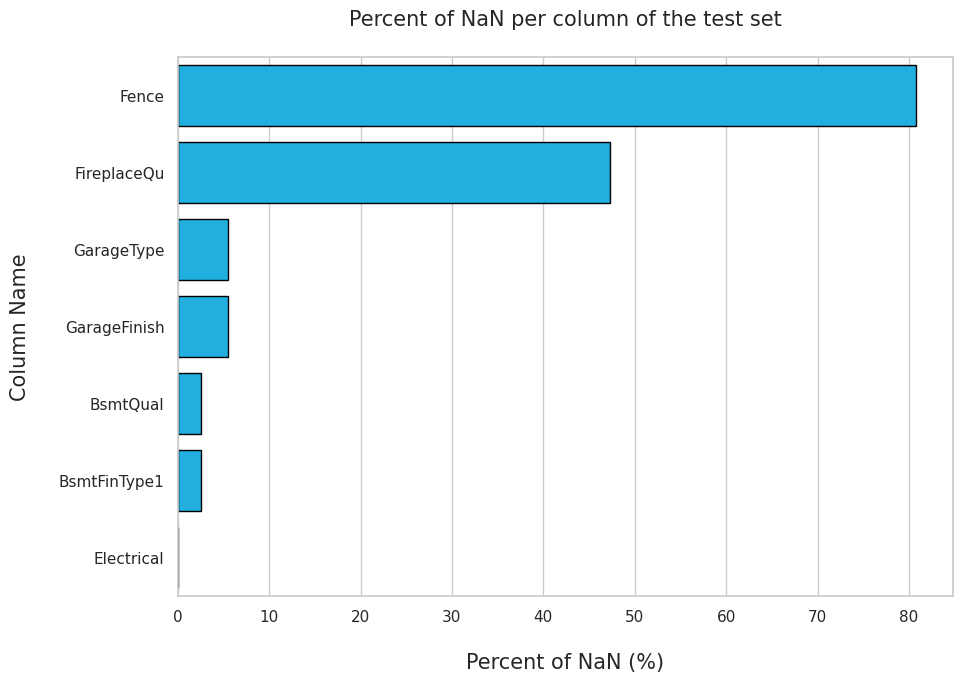

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(
    column_name,
    columns=["Column"]
)
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)
p.set_title("Percent of NaN per column of the test set\n", fontsize=fontsize)
p.set_xlabel("\nPercent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name\n", fontsize=fontsize)

In [ ]:
tab

Column  Percent_NaN
6         Fence        80.75
3   FireplaceQu        47.26
4    GarageType         5.55
5  GarageFinish         5.55
0      BsmtQual         2.53
1  BsmtFinType1         2.53
2    Electrical         0.07

In [ ]:
# Drop the features where the percentage of NaN is higher than 5%
cols_to_drop = [
    "Fence",
    "FireplaceQu",
    "GarageType",
    "GarageFinish"
]

df_train_categ.drop(
    columns=cols_to_drop,
    inplace=True
)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
# Use mode() or modus
categ_fill_null = {
    "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
    "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
    "Electrical": df_train_categ["Electrical"].mode().iloc[0]
}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

#### b. Test Set

In [ ]:
# Drop the same features from test set as for the train set
df_test_categ.drop(
    columns=cols_to_drop,
    axis=1,
    inplace=True
)

Text(0, 0.5, 'Column Name')

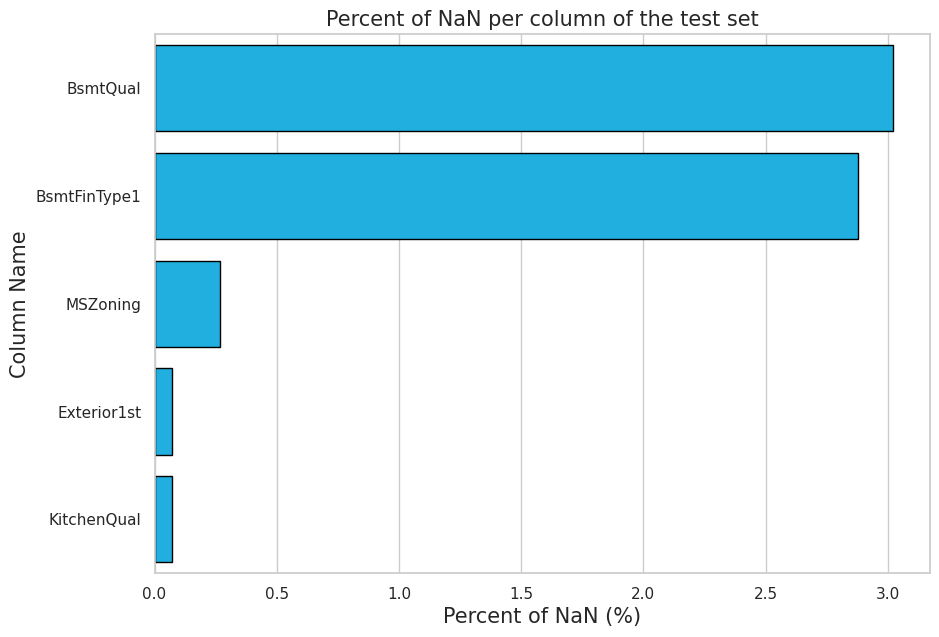

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(
    column_name,
    columns=["Column"]
)
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)
p.set_title("Percent of NaN per column of the test set", fontsize=fontsize)
p.set_xlabel("Percent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name", fontsize=fontsize)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
# mode => karena data kategorikal
categ_fill_null = {
    "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
    "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
    "MSZoning": df_train_categ["MSZoning"].mode().iloc[0],
    "Exterior1st": df_train_categ["Exterior1st"].mode().iloc[0],
    "KitchenQual": df_train_categ["KitchenQual"].mode().iloc[0]
}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)

### 1.2.3. Transform Categorical Features into Binary Features (One-Hot Encoded)

using pandas pd.get_dummies

#### a. Train Set

In [ ]:
df_train_categ.head()

MSZoning LotShape LotConfig Neighborhood Condition1 BldgType HouseStyle  \
0       RL      Reg    Inside      CollgCr       Norm     1Fam     2Story   
1       RL      Reg       FR2      Veenker      Feedr     1Fam     1Story   
2       RL      IR1    Inside      CollgCr       Norm     1Fam     2Story   
3       RL      IR1    Corner      Crawfor       Norm     1Fam     2Story   
4       RL      IR1       FR2      NoRidge       Norm     1Fam     2Story   

  RoofStyle Exterior1st ExterQual Foundation BsmtQual BsmtFinType1 HeatingQC  \
0     Gable     VinylSd        Gd      PConc       Gd          GLQ        Ex   
1     Gable     MetalSd        TA     CBlock       Gd          ALQ        Ex   
2     Gable     VinylSd        Gd      PConc       Gd          GLQ        Ex   
3     Gable     Wd Sdng        TA     BrkTil       TA          ALQ        Gd   
4     Gable     VinylSd        Gd      PConc       Gd          GLQ        Ex   

  Electrical KitchenQual SaleCondition  SalePrice  
0      SBrkr          Gd        Normal     208500  
1      SBrkr          TA        Normal     181500  
2      SBrkr          Gd        Normal     223500  
3      SBrkr          Gd       Abnorml     140000  
4      SBrkr          Gd        Normal     250000

In [ ]:
len(df_train_categ.columns)

18

In [ ]:
for i in df_train_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(
        df_train_categ[i],
        prefix=i,
        dtype=int # Ensure the dummy variables are integers (0 and 1)
    )
    # merge both tables
    df_train_categ = df_train_categ.join(df_dummies)

In [ ]:
df_train_categ.head()

MSZoning LotShape LotConfig Neighborhood Condition1 BldgType HouseStyle  \
0       RL      Reg    Inside      CollgCr       Norm     1Fam     2Story   
1       RL      Reg       FR2      Veenker      Feedr     1Fam     1Story   
2       RL      IR1    Inside      CollgCr       Norm     1Fam     2Story   
3       RL      IR1    Corner      Crawfor       Norm     1Fam     2Story   
4       RL      IR1       FR2      NoRidge       Norm     1Fam     2Story   

  RoofStyle Exterior1st ExterQual  ... KitchenQual_Ex KitchenQual_Fa  \
0     Gable     VinylSd        Gd  ...              0              0   
1     Gable     MetalSd        TA  ...              0              0   
2     Gable     VinylSd        Gd  ...              0              0   
3     Gable     Wd Sdng        TA  ...              0              0   
4     Gable     VinylSd        Gd  ...              0              0   

  KitchenQual_Gd KitchenQual_TA SaleCondition_Abnorml SaleCondition_AdjLand  \
0              1              0                     0                     0   
1              0              1                     0                     0   
2              1              0                     0                     0   
3              1              0                     1                     0   
4              1              0                     0                     0   

  SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                    0                     0                     1   
1                    0                     0                     1   
2                    0                     0                     1   
3                    0                     0                     0   
4                    0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 140 columns]

In [ ]:
df_train_categ.columns.to_list()

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'SaleCondition',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhoo

In [ ]:
# Select the binary features only
df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary['SalePrice'] = df_train_categ['SalePrice']
df_train_binary.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             0             0             0             1                 0   
2             1             0             0             0                 0   
3             1             0             0             0                 1   
4             1             0             0             0                 0   

   ...  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  SaleCondition_Abnorml  \
0  ...               0               1               0                      0   
1  ...               0               0               1                      0   
2  ...               0               1               0                      0   
3  ...               0               1               0                      1   
4  ...               0               1               0                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  SalePrice  
0                     1                      0     208500  
1                     1                      0     181500  
2                     1                      0     223500  
3                     0                      0     140000  
4                     1                      0     250000  

[5 rows x 123 columns]

#### b. Test Set

In [ ]:
df_test_categ.head()

MSZoning LotShape LotConfig Neighborhood Condition1 BldgType HouseStyle  \
0       RH      Reg    Inside        NAmes      Feedr     1Fam     1Story   
1       RL      IR1    Corner        NAmes       Norm     1Fam     1Story   
2       RL      IR1    Inside      Gilbert       Norm     1Fam     2Story   
3       RL      IR1    Inside      Gilbert       Norm     1Fam     2Story   
4       RL      IR1    Inside      StoneBr       Norm   TwnhsE     1Story   

  RoofStyle Exterior1st ExterQual Foundation BsmtQual BsmtFinType1 HeatingQC  \
0     Gable     VinylSd        TA     CBlock       TA          Rec        TA   
1       Hip     Wd Sdng        TA     CBlock       TA          ALQ        TA   
2     Gable     VinylSd        TA      PConc       Gd          GLQ        Gd   
3     Gable     VinylSd        TA      PConc       TA          GLQ        Ex   
4     Gable     HdBoard        Gd      PConc       Gd          ALQ        Ex   

  Electrical KitchenQual SaleCondition  
0      SBrkr          TA        Normal  
1      SBrkr          Gd        Normal  
2      SBrkr          TA        Normal  
3      SBrkr          Gd        Normal  
4      SBrkr          Gd        Normal

In [ ]:
len(df_test_categ.columns)

17

In [ ]:
for i in df_test_categ.columns.tolist():
    df_dummies = pd.get_dummies(
        df_test_categ[i],
        prefix=i,
        dtype=int # Ensure the dummy variables are integers (0 and 1)
    )

    # merge both tables
    df_test_categ = df_test_categ.join(df_dummies)

# Select the binary features only
df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             1             0             0             0                 1   
2             1             0             0             0                 0   
3             1             0             0             0                 0   
4             1             0             0             0                 0   

   ...  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
0  ...               0               0               0               1   
1  ...               0               0               1               0   
2  ...               0               0               0               1   
3  ...               0               0               1               0   
4  ...               0               0               1               0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 118 columns]

In [ ]:
df_test_categ.columns.to_list()

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'SaleCondition',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'N

### 1.2.4. Test & Train Columns Cross Check

Let's check if the column headings are the same in both data set, df_train and df_test

In [ ]:
# Compare column headings in df_train_binary and df_test_binary
def compare_columns(df1, df2, df1_name, df2_name):
    """
    Compares columns of two dataframes and prints the differences.

    Args:
        df1: The first DataFrame.
        df2: The second DataFrame.
        df1_name: Name of the first DataFrame (for printing).
        df2_name: Name of the second DataFrame (for printing).

    Returns:
        diff_1: List of columns in df1 but not in df2.
        diff_2: List of columns in df2 but not in df1.
    """

    cols1 = set(df1.columns)
    cols2 = set(df2.columns)

    diff_1 = list(cols1 - cols2)
    print(f"Columns in {df1_name} but not in {df2_name}: {diff_1}\n")

    diff_2 = list(cols2 - cols1)
    print(f"Columns in {df2_name} but not in {df1_name}: {diff_2}")

    return diff_1, diff_2

In [ ]:
diff_1, diff_2 = compare_columns(
    df_train_binary,
    df_test_binary,
    "df_train_binary",
    "df_test_binary"
)

Columns in df_train_binary but not in df_test_binary: ['Exterior1st_Stone', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Electrical_Mix', 'SalePrice']

Columns in df_test_binary but not in df_train_binary: []


In [ ]:
diff_1

['Exterior1st_Stone',
 'HouseStyle_2.5Fin',
 'Exterior1st_ImStucc',
 'Electrical_Mix',
 'SalePrice']

In [ ]:
diff_1.remove('SalePrice')

In [ ]:
diff_1

['Exterior1st_Stone',
 'HouseStyle_2.5Fin',
 'Exterior1st_ImStucc',
 'Electrical_Mix']

In [ ]:
diff_2

[]

In [ ]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(
    columns=diff_1,
    inplace=True
)

In [ ]:
# Check again if the column headings are the same in both data set
_, _ = compare_columns(
    df_train_binary,
    df_test_binary,
    "df_train_binary",
    "df_test_binary"
)

Columns in df_train_binary but not in df_test_binary: ['SalePrice']

Columns in df_test_binary but not in df_train_binary: []


Both data set have the same features now

## 1.3. Merge Numerical and Binary Features into One Data Set

In [ ]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 135)
Test set: (1459, 134)


## 1.4. Drop outliers from the train set

### a. WoodDeckSF & OpenPorchSF

We also noticed for both features "WoodDeckSF" and "OpenPorchSF" a high number of 0 values with a correspondingly high price variation. These outliers should be deleted. However, since the number of these outliers is very important, the best thing to do is to drop these columns.

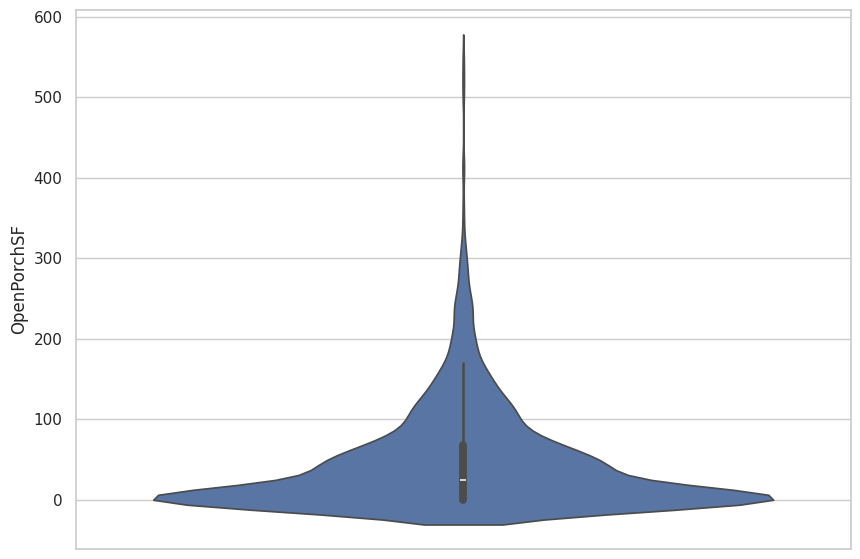

In [ ]:
sns.violinplot(data=df_train_new, y="OpenPorchSF");

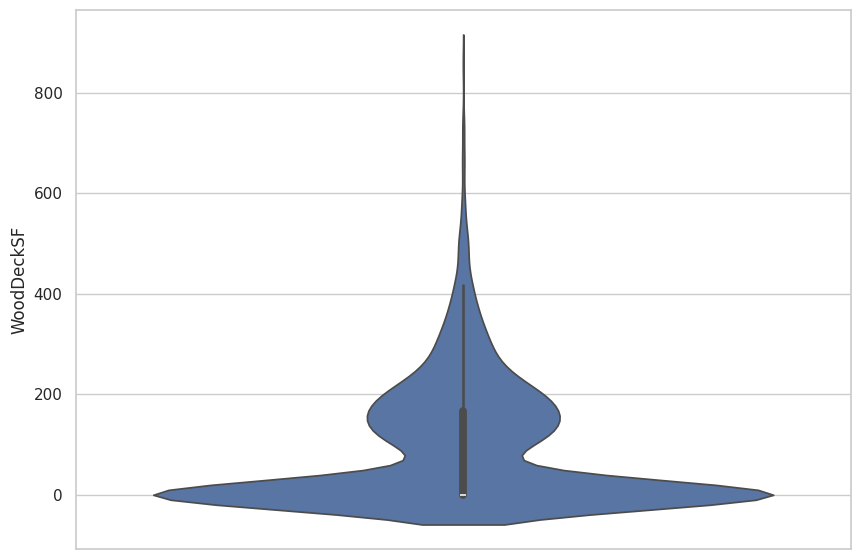

In [ ]:
sns.violinplot(data=df_train_new, y="WoodDeckSF");

In [ ]:
# Drop "WoodDeckSF" and "OpenPorchSF" --> See Numerical Features Viz
cols_to_drop = ["WoodDeckSF", "OpenPorchSF"] # delete outliers

df_train_new.drop(columns=cols_to_drop, inplace=True)
df_test_new.drop(columns=cols_to_drop, inplace=True)

### b. GrLivArea, TotalBsmtSF & GarageArea

Previoulsy in the part '1.1. Numerical Features' of this notebook we noticed some houses with large surface ("GrLivArea", "TotalBsmtSF" and "GarageArea") and with a very low Price. It is better for our models to drop theese outliers.



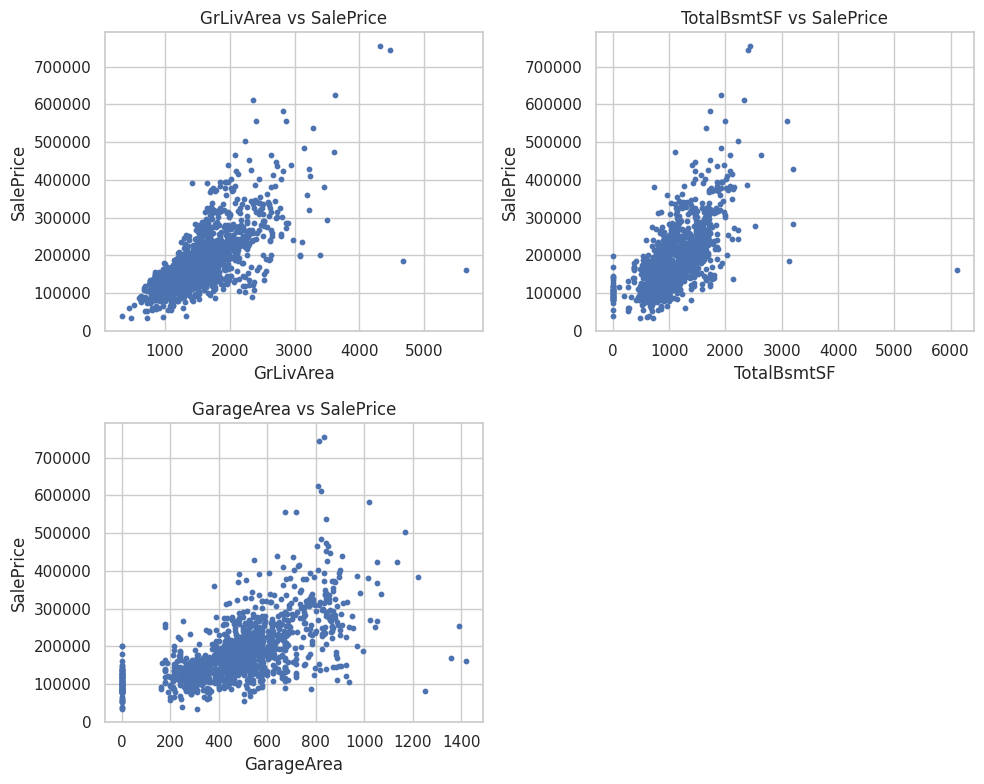

In [ ]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Features to plot
features = ["GrLivArea", "TotalBsmtSF", "GarageArea"]

# Iterate over each feature and plot against SalePrice
for i, feature in enumerate(features):
    ax = axs[i]
    ax.scatter(df_train_new[feature], df_train_new['SalePrice'], s=10)
    ax.set_title(f'{feature} vs SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')

# Hide the last subplot
axs[-1].axis('off')
fig.tight_layout()
plt.show()

In [ ]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (
    df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

In [ ]:
# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


# 2.&nbsp;Feature Engineering

### 2.1. New Features Creation

#### a. Floor Occupation

In [ ]:
# Define a function to calculate the occupancy rate
# of the first floor of the total living area

def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]

In [ ]:
# Apply the function on each row of the train and test set
df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1
)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1
)

In [ ]:
# Drop "1stFlrSF" and "2ndFlrSF"
df_train_new.drop(
    columns=["1stFlrSF", "2ndFlrSF"],
    inplace=True
)

df_test_new.drop(
    columns=["1stFlrSF", "2ndFlrSF"],
    inplace=True
)

#### b. Basement Finished Occupancy Rate

In [ ]:
# Define a function to calculate the occupancy rate
# of the finished basement area

def bsmt_finish(x):
    """Propotion of finished area in basement

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]

In [ ]:
# Apply the function on train and test set
df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1
)

df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1
)

In [ ]:
# Drop "BsmtFinSF1"
df_train_new.drop(
    columns=["BsmtFinSF1"],
    inplace=True
)

df_test_new.drop(
    columns=["BsmtFinSF1"],
    inplace=True
)

#### c. Age Since Construction

In [ ]:
# Convert Year of construction to Age of the house since the construction
df_train_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"]
df_test_new["AgeSinceConst"] = df_test_new["YearBuilt"].max() - df_test_new["YearBuilt"]

In [ ]:
# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

#### d. Age Since Remodeled

In [ ]:
# Convert Year of remodeling to Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"]
df_test_new["AgeSinceRemod"] = df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"]

In [ ]:
# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

### 2.1. Verify Numerical Columns Skewness

To avoid redundancy and to mitigate the strong variations of some features according to the SalePrice.

We will use a log transformation for skewed features.

Generally in real estate, as the area of the property increases, the price per square feet decreases, hence the use of log.

In [ ]:
continuous_features = [
    "OverallQual", "TotalBsmtSF", "GrLivArea",
    "FullBath", "TotRmsAbvGrd", "GarageCars",
    "GarageArea", "MasVnrArea", "Fireplaces",
    "1stFlrPercent", "BsmtFinPercent", "AgeSinceConst",
    "AgeSinceRemod"
]

df_skew_verify = df_train_new.loc[:, continuous_features]

In [ ]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame(
    {
        "Columns": continuous_features,
        "Abs_Skew": skew_ft
    }
)

sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print("List of skewed features:\n")
pprint.pprint(sk_features)

List of skewed features:

['GrLivArea',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'Fireplaces',
 'AgeSinceConst',
 'AgeSinceRemod']


In [ ]:
# Log transformation of the skewed features
# sk_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "GarageArea"]

# loop over i (features) to calculate Log of surfaces
for i in sk_features:

    # Train set
    df_train_new[i] = np.log((df_train_new[i]) + 1)

    # Test set
    df_test_new[i] = np.log((df_test_new[i]) + 1)

# Adding +1 before applying log transformation handles cases where the feature value is zero.
# The log of zero is undefined,
# so adding 1 avoids this issue and ensures a valid log transformation.

# 3.&nbsp;Preparing Data for Modeling

## 3.1 Target Variable 'SalePrice'

Text(0, 0.5, '')

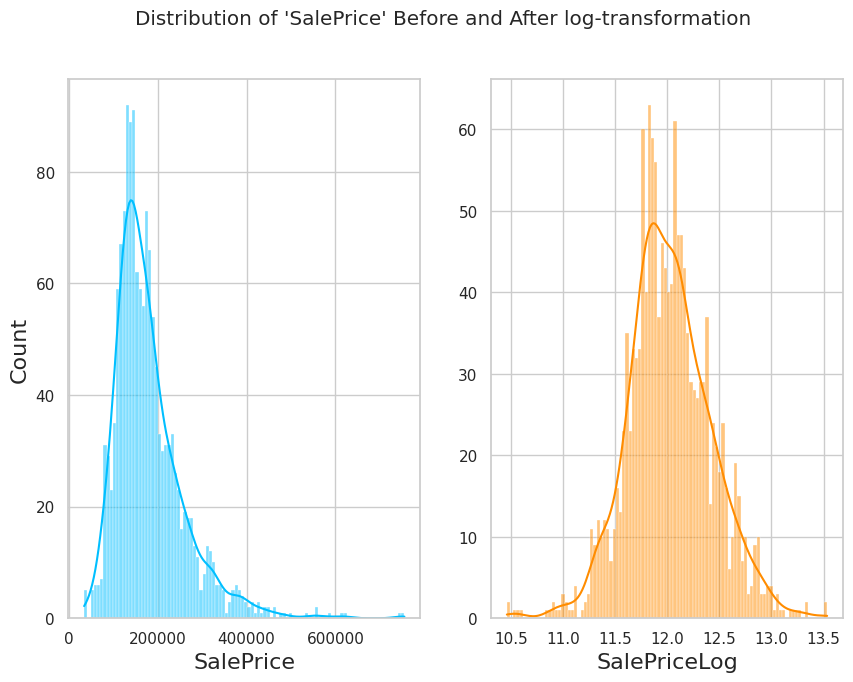

In [ ]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' Before and After log-transformation")
fontsize = 16

# before log transformation
p = sns.histplot(
    ax=axes[0],
    x=df_train_new["SalePrice"],
    kde=True,
    bins=100,
    color="deepskyblue"
)
p.set_xlabel("SalePrice", fontsize=fontsize)
p.set_ylabel("Count", fontsize=fontsize)

# after log transformation
q = sns.histplot(
    ax=axes[1],
    x=df_train_new["SalePriceLog"],
    kde=True,
    bins=100,
    color="darkorange"
)

q.set_xlabel("SalePriceLog", fontsize=fontsize)
q.set_ylabel("", fontsize=fontsize)

In [ ]:
# Drop the original SalePrice
df_train_new.drop(
    columns=["SalePrice"],
    inplace=True
)

## 3.2. Data Splitting and Standardization

#### a. Splitting the Dataset into Train and Test

In [ ]:
# Extract the features (X) and the target (y)

# Features (X)
predictors = [i for i in list(df_train_new.columns) if i != "SalePriceLog"]
X = df_train_new[predictors]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 131)
(1454,)


In [ ]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins to convert continuous to categories for stratification
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y_binned,
    shuffle=True,
    random_state=42
)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 131)
y_train:(1163,)

X_test:(291, 131)
y_test:(291,)


#### b. Data Standardization

In [ ]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

## 3.3. Backward Stepwise Regression

Let's lighten the model vith a Backward Stepwise Regression

Backward Stepwise Regression is a stepwise regression approach that begins with a full (saturated) model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

Source:
https://www.analystsoft.com/en/products/statplus/content/help/pdf/analysis_regression_backward_stepwise_elimination_regression_model.pdf

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature: {worst_feature}, {worst_pval}")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature: Neighborhood_Somerst, 0.988900192425169
worst_feature: BldgType_2fmCon, 0.9781411131088513
worst_feature: Neighborhood_Blueste, 0.934644264966223
worst_feature: Neighborhood_SWISU, 0.9373343306168839
worst_feature: Neighborhood_Blmngtn, 0.8972417202356399
worst_feature: RoofStyle_Gambrel, 0.8927687445342385
worst_feature: RoofStyle_Gable, 0.9723807585486302
worst_feature: Exterior1st_Stucco, 0.8887701029827896
worst_feature: Exterior1st_CemntBd, 0.8966393647608825
worst_feature: Exterior1st_Plywood, 0.9416536464046587
worst_feature: TotRmsAbvGrd, 0.889754834349721
worst_feature: Neighborhood_NAmes, 0.8859405375666303
worst_feature: Exterior1st_AsphShn, 0.8734479657865906
worst_feature: Condition1_PosN, 0.8265118193080185
worst_feature: Exterior1st_MetalSd, 0.8245767538191142
worst_feature: Condition1_RRNe, 0.8096157862015457
worst_feature: Condition1_Artery, 0.8073735101666025
worst_feature: ExterQual_Fa, 0.8096872147810478
worst_feature: ExterQual_Gd, 0.9931913753178969

Berikut adalah interpretasi dari output tersebut:

worst_feature: Ini menunjukkan nama fitur (variabel prediktor) yang sedang dievaluasi.
Nilai di samping nama fitur: Ini adalah nilai p yang terkait dengan koefisien regresi fitur tersebut dalam model saat itu.
Apa arti dari nilai p ini dalam konteks backward stepwise regression?

Semakin tinggi nilai p, semakin tidak signifikan secara statistik fitur tersebut dalam memprediksi variabel target (setelah mempertimbangkan fitur-fitur lain dalam model). Dengan kata lain, fitur dengan nilai p yang tinggi memberikan kontribusi yang lebih kecil dan mungkin tidak perlu dipertahankan dalam model.
Dalam setiap langkah backward stepwise regression, algoritma akan mencari fitur dengan nilai p tertinggi (melebihi batas kriteria penghapusan yang telah ditentukan). Fitur inilah yang kemudian akan dihilangkan dari model pada langkah tersebut.
Contoh Interpretasi Beberapa Baris:

worst_feature : RoofStyle_Flat, 0.996347302656994: Fitur RoofStyle_Flat memiliki nilai p yang sangat tinggi (mendekati 1). Ini menunjukkan bahwa keberadaan fitur ini dalam model tidak memberikan kontribusi yang signifikan secara statistik dalam memprediksi variabel target, dengan adanya fitur-fitur lain. Fitur ini kemungkinan besar akan menjadi kandidat awal untuk dihilangkan dalam proses backward stepwise.

worst_feature : FullBath, 0.19131078967422416: Fitur FullBath memiliki nilai p yang lebih rendah dibandingkan RoofStyle_Flat, namun masih mungkin di atas batas kriteria penghapusan (misalnya 0.05 atau 0.10). Jika ini terjadi, FullBath juga bisa menjadi kandidat untuk dihilangkan pada langkah selanjutnya jika tidak ada fitur lain dengan nilai p yang lebih tinggi.

worst_feature : LotConfig_CulDSac, 0.05346601223224677: Fitur LotConfig_CulDSac memiliki nilai p yang relatif rendah, mendekati 0.05. Ini menunjukkan bahwa fitur ini mungkin signifikan secara statistik pada langkah ini (tergantung pada kriteria penghapusan yang digunakan). Fitur dengan nilai p serendah ini cenderung dipertahankan dalam model.

Kesimpulan dari Output:

Daftar fitur yang Anda berikan kemungkinan besar adalah hasil dari evaluasi signifikansi pada salah satu langkah dalam proses backward stepwise regression. Fitur-fitur di bagian atas daftar (dengan nilai p yang tinggi) adalah kandidat terkuat untuk dihilangkan pada langkah berikutnya, karena mereka dianggap paling tidak signifikan dalam menjelaskan variasi variabel target berdasarkan model saat itu. Proses ini akan berlanjut hingga hanya fitur-fitur yang signifikan secara statistik yang tersisa dalam model (berdasarkan kriteria penghapusan yang ditetapkan).

In [ ]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

## 3.4. Variance Inflation Factor

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

A feature with a VIF higher than 10 implies (5 is also common) that there is a multi-collinearity with the latter.

https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=Variance%20inflation%20factor%20(VIF)%20is,only%20that%20single%20independent%20variable.

In [ ]:
# Here we calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

VIF Factor               features
0         3.40            OverallQual
1         2.10              GrLivArea
2         1.90             GarageArea
3         1.80            TotalBsmtSF
4         1.60             Fireplaces
5         1.10       MSZoning_C (all)
6         1.50            MSZoning_FV
7         2.20            MSZoning_RL
8         1.10           LotShape_IR2
9         1.10       LotConfig_Corner
10        1.10      LotConfig_CulDSac
11        1.10   Neighborhood_ClearCr
12        1.10   Neighborhood_Crawfor
13        1.20   Neighborhood_Edwards
14        1.20   Neighborhood_NoRidge
15        1.60   Neighborhood_OldTown
16        1.10   Neighborhood_StoneBr
17        1.20        Condition1_Norm
18        1.10        Condition1_RRAe
19        1.40          BldgType_1Fam
20        1.30         BldgType_Twnhs
21        1.10    Exterior1st_BrkComm
22        1.10    Exterior1st_BrkFace
23        1.20    Exterior1st_Wd Sdng
24        1.40      Foundation_BrkTil
25        1.00        Foundation_Wood
26        2.20            BsmtQual_Ex
27        2.00            BsmtQual_Gd
28        1.20           HeatingQC_Fa
29        1.40           HeatingQC_TA
30        1.40       Electrical_FuseP
31        1.50         KitchenQual_Ex
32        1.10  SaleCondition_Abnorml
33        1.40  SaleCondition_AdjLand
34        1.00   SaleCondition_Family
35        1.20         BsmtFinPercent
36        2.10          AgeSinceRemod

In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

None of the features have a high multicollinearity


The strong muticollinearity is probably due to the presence of a lot 0's in these binary features. These features must be dropped if found any

In [ ]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

## 3.5. Cook Distance

By calculating Cook distance we can detect influential observations in a regression model.

Cook distance detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame(
    {
        "Cook_Distance": cooks[0],
        "p_value": cooks[1]
    }
)

cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.01     1.00
3           0.00     1.00
4           0.00     1.00

In [ ]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


# 4.&nbsp;Modeling

## 4.1. Models and Metrics Selection

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
dtr =  DecisionTreeRegressor()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [dtr, ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: DecisionTreeRegressor
R²: 0.7614226539196862
RMSE: 0.18971674231681726

- Regressor: Ridge
R²: 0.8922744524573971
RMSE: 0.1274824531790733

- Regressor: Lasso
R²: 0.8940939075937987
RMSE: 0.12640129668522535

- Regressor: ElasticNet
R²: 0.8932601872659351
RMSE: 0.1268978533007907

- Regressor: RandomForestRegressor
R²: 0.8631886730364319
RMSE: 0.14366536635030333

- Regressor: XGBRegressor
R²: 0.8629038333892822
RMSE: 0.14381481787700717

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 29
[LightGBM] [Info] Start training from score 12.021046
- Regressor: LGBMRegressor
R²: 0.867416643080622
RMSE: 0.1

## 4.2. Hyperparameters Tuning and Model Optimization

### 4.2.1. Ridge regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters (tunable)
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas,
                    "tol":[1e-3, 1e-6],
                    "solver": ["auto", "saga"]}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best hyperparameters: {'alpha': 58.57020818056661, 'solver': 'saga', 'tol': 1e-06}
Best R² (train): 0.9016854634558614


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"],
                  tol=ridge_cv.best_params_["tol"],
                  solver=ridge_cv.best_params_["solver"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.8936549911845212
RMSE: 0.12666295415225448


In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

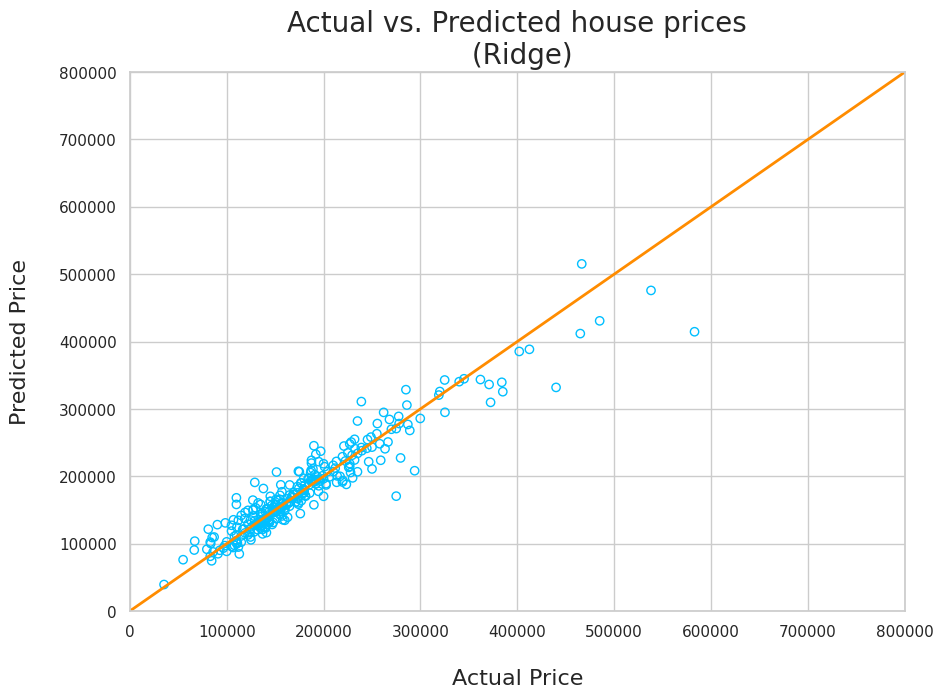

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 4.2.2. Lasso regression

In [ ]:
# Define hyperparameters (tunable)
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas,
                    "tol":[1e-3, 1e-6],
                    "selection":["cyclic", "random"]}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Best hyperparameters: {'alpha': 0.0006579332246575682, 'selection': 'cyclic', 'tol': 1e-06}
Best R² (train): 0.9014418459734814


In [ ]:
# Lasso regressor with best hyperparams
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"],
                  tol=lasso_cv.best_params_["tol"],
                  selection=lasso_cv.best_params_["selection"])

# fit on train set
lasso_mod.fit(X_train, y_train)

# predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.8935264719285565
RMSE: 0.12673946791414098


In [ ]:
# Save model to lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

In [ ]:
model_list


['Ridge', 'Lasso']

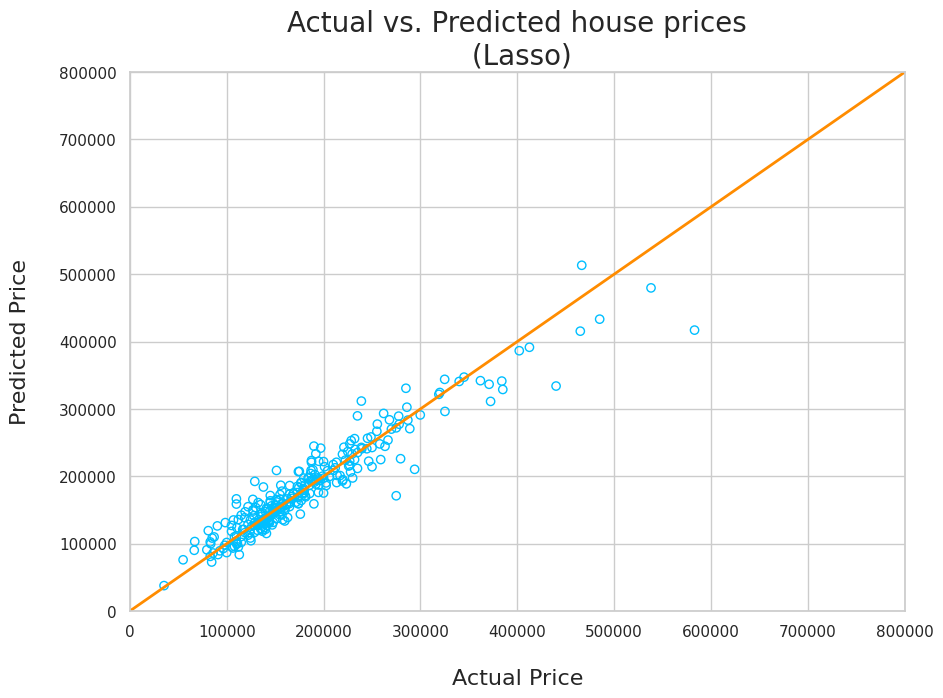

In [ ]:
# Plot using model
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 4.2.3. XGBoost regression

In [ ]:
# Define hyperparameters (tunable)
tuned_parameters = {
    "max_depth": [3, 5, 7],
    "subsample": [0.3, 0.7],
    "colsample_bytree": [0.3, 0.7],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 300, 500]
}

# GridSearch
xgbr_cv = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=tuned_parameters,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.3}

Best R²: 0.897393274307251


In [ ]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(
    seed=20,
    colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
    #subsample=xgbr_cv.best_params_["subsample"],
    learning_rate=xgbr_cv.best_params_["learning_rate"],
    max_depth=xgbr_cv.best_params_["max_depth"],
    n_estimators=xgbr_cv.best_params_["n_estimators"]
)

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- XGBRegressor
R²: 0.9004669189453125
RMSE: 0.12253912736929289


In [ ]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

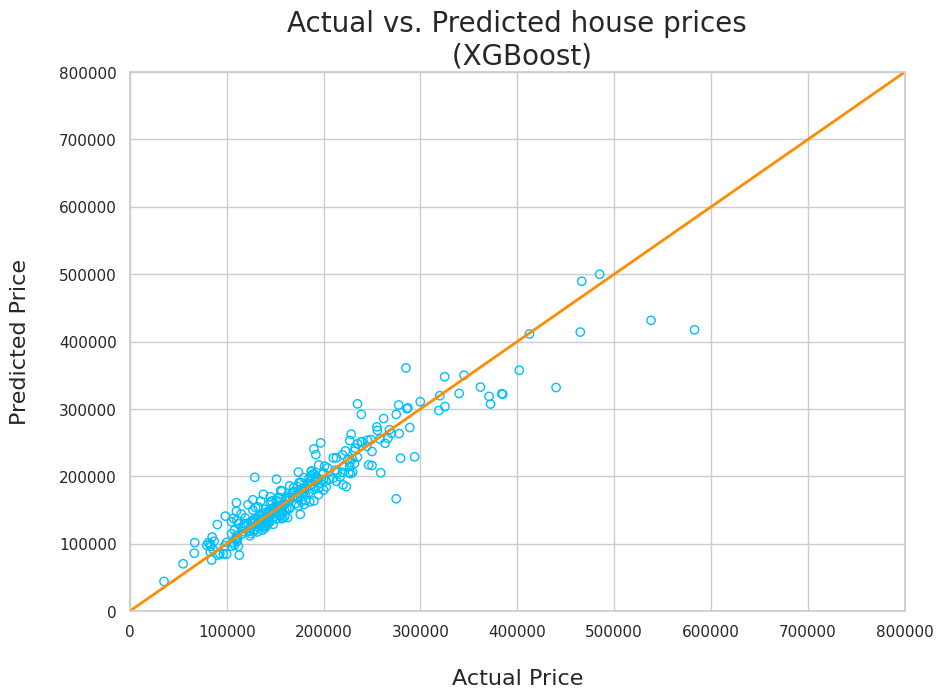

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### 4.2.4. LightGBM regression

In [ ]:
# Define hyperparameters (tunable)
tuned_parameters = {
    "max_depth": [3, 5, 7],
    "bagging_fraction": [0.3, 0.7],
    "feature_fraction": [0.3, 0.7],
    "learning_rate": [0.01, 0.05, 0.1],
    "num_iterations": [100, 300, 500]
}

# GridSearch
lgbr_cv = GridSearchCV(
    estimator=LGBMRegressor(),
    param_grid=tuned_parameters,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# fit the GridSearch on train set
lgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R2
print(f"Best hyperparameters: {lgbr_cv.best_params_}\n")
print(f"Best R²: {lgbr_cv.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 29
[LightGBM] [Info] Start

In [ ]:
# LightGBM with best hyperparams
lgbr_mod = LGBMRegressor(
    seed=20,
    #bagging_fraction=lgbr_cv.best_params_["bagging_fraction"],
    feature_fraction=lgbr_cv.best_params_["feature_fraction"],
    learning_rate=lgbr_cv.best_params_["learning_rate"],
    max_depth=lgbr_cv.best_params_["max_depth"],
    num_iterations=lgbr_cv.best_params_["num_iterations"]
)

# Fit model on train set
lgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbr_mod.predict(X_test)

print(f"- {lgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 29
[LightGBM] [Info] Start training from score 12.021046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [ ]:
# Save model to list (append)
model_list.append(lgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

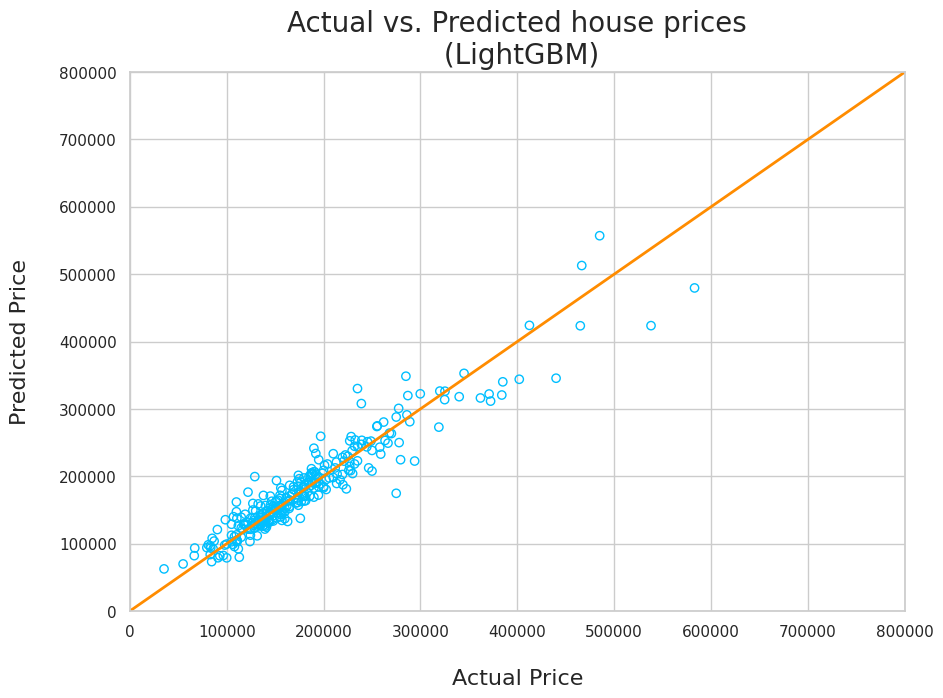

In [ ]:
# Plot actual vs predicted house price with lgbm
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LightGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

## 4.3. Choosing the Best Model

In [ ]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame(
    {
        "Model": model_list,
        "R²": r2_list,
        "RMSE": rmse_list
    }
)

model_results

Model   R²  RMSE
0          Ridge 0.89  0.13
1          Lasso 0.89  0.13
2   XGBRegressor 0.90  0.12
3  LGBMRegressor 0.89  0.13

In [ ]:
# Pilih best model berdasar RMSE, karena menilai seberapa akurat prediksi yang dihasilkan
best_model_rmse = model_results.loc[model_results["RMSE"] == model_results["RMSE"].min()]
best_model_rmse

Model   R²  RMSE
2  XGBRegressor 0.90  0.12

Answer:
Best model = XGBRegressor (low RMSE)

## 4.4. Prediction on Real Test Dataset

In [280]:
# Predictions from XGB model to df_test_new
predictions_list = xgbr_mod.predict(df_test_new)

# Conversion of logarithmic predictions to logical data Sale Price
saleprice_preds = np.exp(predictions_list)

# DataFrame of test ID and their corresponding predictions
output = pd.DataFrame(
    {
        "Id": Id_test,
        "SalePrice": saleprice_preds
    }
)

output.head(10)

Id  SalePrice
0  1461 118,006.55
1  1462 144,441.72
2  1463 181,223.39
3  1464 181,048.58
4  1465 194,163.59
5  1466 177,411.89
6  1467 170,671.31
7  1468 169,043.36
8  1469 197,174.05
9  1470 122,398.02

# 5.&nbsp;Conclusion

Proses dimulai dari menghubungkan ke google drive untuk loading dataset, kemudian dimulai dengan EDA untuk membersihkan, menganalisis, dan memilih data yang akan didrop. <br>
<br>

**Feature yang akan didrop** merupakan data yang memenuhi kriteria berikut:
1. Memiliki nilai yang sama/mirip dengan feature lain (quasi-constant)
2. Weakly correlated dengan "SalesPrice"
3. Features yang distribusinya berubah setelah imputasi
4. Features yang nilainya terkonsentrasi pada 1 kategori *atau* memiliki outlier besar yang tidak bisa dibersihkan
5. Features yang saling berhubungan (co-dependence)
6. Features yang hanya ada di salah satu set (train atau test) kecuali "SalesPrice" untuk balancing dataset


Kemudian melakukan proses **Feature Engineering** untuk memodifikasi atau mengkombinasi feature yang ada.
Dilakukan juga transformasi data yang "skewed" atau tidak normal menggunakan transformasi log. <br>
<br>

Setelah itu **data disiapkan untuk modelling** dengan cara:
1. Data target "SalesPrice" dilakukan transformasi log
2. Data train-test splitting dengan metode stratifikasi
3. Standardize dengan StandardScaler
4. Feature selection dengan metode *backward stepwise regression* untuk menghilangkan feature yang tidak relevan dan mencegah overfitting
5. Metode feature selection lain yang digunakan adalah *variance inflation factor* dan *cook distance*

Pada tahap modelling, dilakukan **pengujian terhadap setiap model** dengan mencoba berbagai hyperparameter untuk mencari model yang terbaik.<br>
<br>

Model yang terbaik merupakan model dengan RMSE yang rendah karena menilai seberapa akurat prediksi yang dihasilkan. Model terbaik yang didapatkan adalah model **XGBRegressor**